#### The puprpose of this notebook is to calculate Original EWG and Modified EWG nutrition score on all food database (59K).

#### Author - Reshma

In [1]:
#import libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
import copy
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

## Macronutrients

#### EWG's raw scoring framework, per 100 grams of solid product*
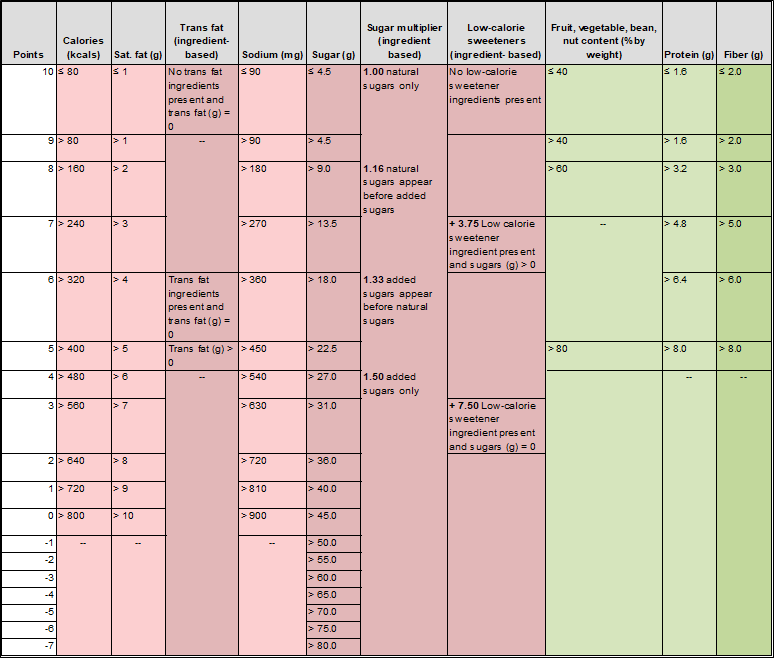

#### EWG's raw scoring framework, per 100 grams of liquid product*
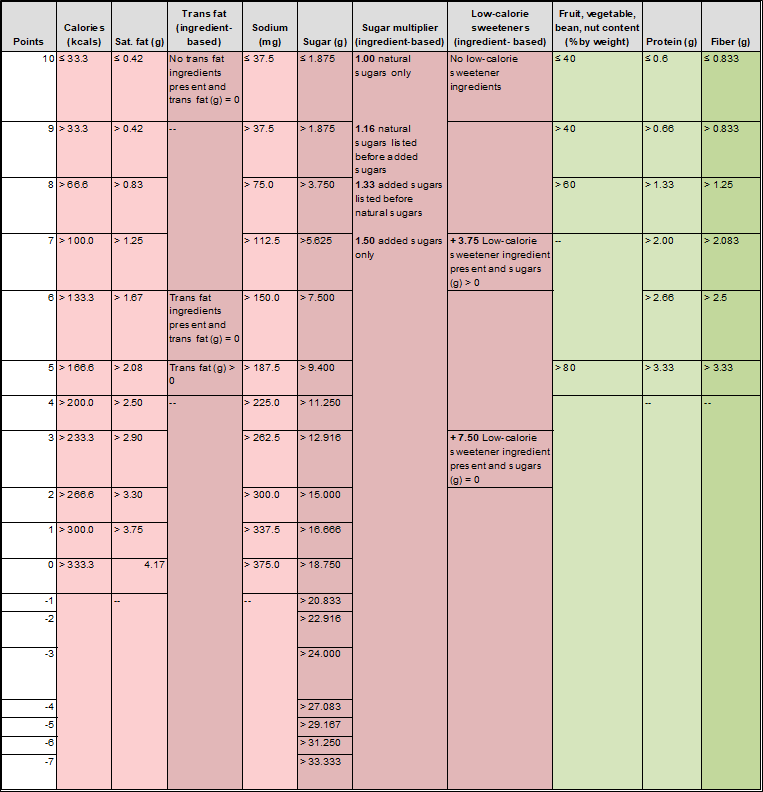

In [16]:
#create calorie dataframe
cal_df                        = pd.DataFrame(columns = ['Points', 'cal_solid_lower_bd', 'cal_solid_up_bd', 'cal_liquid_lower_bd', 'cal_liquid_up_bd'])
cal_df['Points']              = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
cal_df['cal_solid_lower_bd']  = np.array([0, 80, 160, 240, 320, 400, 480, 560, 640, 720, 800])
cal_df['cal_solid_up_bd']     = np.array([80, 160, 240, 320, 400, 480, 560, 640, 720, 800, 100000])
cal_df['cal_liquid_lower_bd'] = np.array([0, 33.3, 66.6, 100, 133.3, 166.6, 200, 233.3, 266.6, 300, 333.3])
cal_df['cal_liquid_up_bd']    = np.array([33.3, 66.6, 100, 133.3, 166.6, 200, 233.3, 266.6, 300, 333.3, 100000])

In [17]:
#create saturated fat dataframe
sat_fat_df                          = pd.DataFrame(columns = ['Points', 's_fat_solid_lower_bd', 's_fat_solid_up_bd', 's_fat_liquid_lower_bd', 's_fat_liquid_up_bd'])
sat_fat_df['Points']                = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
sat_fat_df['s_fat_solid_lower_bd']  = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sat_fat_df['s_fat_solid_up_bd']     = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100000])
sat_fat_df['s_fat_liquid_lower_bd'] = np.array([0, 0.42, 0.83, 1.25, 1.67, 2.08, 2.50, 2.90, 3.30, 3.75, 4.17])
sat_fat_df['s_fat_liquid_up_bd']    = np.array([0.42, 0.83, 1.25, 1.67, 2.08, 2.50, 2.90, 3.30, 3.75, 4.17, 100000])

In [18]:
#create sodium dataframe
sodium_df                           = pd.DataFrame(columns = ['Points', 'sodium_solid_lower_bd', 'sodium_solid_up_bd', 'sodium_liquid_lower_bd', 'sodium_liquid_up_bd'])
sodium_df['Points']                 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
sodium_df['sodium_solid_lower_bd']  = np.array([0, 90, 180, 270, 360, 450, 540, 630, 720, 810, 900])
sodium_df['sodium_solid_up_bd']     = np.array([90, 180, 270, 360, 450, 540, 630, 720, 810, 900, 10000000])
sodium_df['sodium_liquid_lower_bd'] = np.array([0, 37.5, 75.0, 112.5, 150, 187.5, 225, 262.5, 300, 337.5, 375.0])
sodium_df['sodium_liquid_up_bd']    = np.array([37.5, 75.0, 112.5, 150, 187.5, 225, 262.5, 300, 337.5, 375.0, 10000000])

In [19]:
#create sugar dataframe
sugar_df                          = pd.DataFrame(columns = ['Points', 'sugar_solid_lower_bd', 'sugar_solid_up_bd', 'sugar_liquid_lower_bd', 'sugar_liquid_up_bd'])
sugar_df['Points']                = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -7]) ##James updated!!!!!!!!!!!!!!!!!!
sugar_df['sugar_solid_lower_bd']  = np.array([0, 4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45, 50, 55, 60, 65, 70, 75, 80])
sugar_df['sugar_solid_up_bd']     = np.array([4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100000])
sugar_df['sugar_liquid_lower_bd'] = np.array([0, 1.875, 3.75, 5.625, 7.5, 9.4, 11.25, 12.916, 15, 16.66, 18.75, 20.833, 22.916, 24, 27.083, 29.167, 31.250, 33.333])
sugar_df['sugar_liquid_up_bd']    = np.array([1.875, 3.75, 5.625, 7.5, 9.4, 11.25, 12.916, 15, 16.66, 18.75, 20.833, 22.916, 24, 27.083, 29.167, 31.250, 33.333, 100000])

In [20]:
#create protein dataframe
protein_df                            = pd.DataFrame(columns = ['Points', 'protein_solid_lower_bd', 'protein_solid_up_bd', 'protein_liquid_lower_bd', 'protein_liquid_up_bd'])
protein_df['Points']                  = np.array([10, 9, 8, 7, 6, 5])
protein_df['protein_solid_lower_bd']  = np.array([0, 1.6, 3.2, 4.8, 6.4, 8.0])
protein_df['protein_solid_up_bd']     = np.array([1.6, 3.2, 4.8, 6.4, 8.0, 100000])
protein_df['protein_liquid_lower_bd'] = np.array([0, 0.66, 1.33, 2, 2.66, 3.33])
protein_df['protein_liquid_up_bd']    = np.array([0.66, 1.33, 2, 2.66, 3.33, 100000])

In [21]:
#create a fiber dataframe
fiber_df                          = pd.DataFrame(columns = ['Points', 'fiber_solid_lower_bd', 'fiber_solid_up_bd', 'fiber_liquid_lower_bd', 'fiber_liquid_up_bd'])
fiber_df['Points']                = np.array([10, 9, 8, 7, 6, 5])
fiber_df['fiber_solid_lower_bd']  = np.array([0, 2, 3, 5, 6, 8])
fiber_df['fiber_solid_up_bd']     = np.array([2, 3, 5, 6, 8, 100000])
fiber_df['fiber_liquid_lower_bd'] = np.array([0, 0.833, 1.25, 2.083, 2.5, 3.33])
fiber_df['fiber_liquid_up_bd']    = np.array([0.833, 1.25, 2.083, 2.5, 3.33, 100000])

### Reading food items from datasets

In [2]:
path     = 'Courses/Capstone/'
fileName = 'Datasets/Nutrition/Nutrition Data Consolidated (James)_August_15_with_type.csv'
data      = pd.read_csv(path+fileName)

In [9]:
data.columns = [col.strip() for col in data.columns]
data.name.isnull().any()

False

#### Seperate solid and liquid food items
* liquid cut points to all beverages or foods that were more than 60 percent water: 
    * 'soft drinks', 'yogurt', 'milk', 'red wines', 'ice cream ice', 'white wines', 'water seltzer sparkling water', 'soy lactosefree','juice nectars','energy sports drinks', 'cocoa drink mixes','spirits','frozen dessert', 'frozen juice', 'soup broth bouillon'

In [22]:
## functions
def separate_food_type(aisle):
    '''This function returns type of a food whether it is liquid or solid food '''
    liquid_foods =['soft drinks', 'yogurt', 'milk', 'red wines', 'ice cream ice', 'white wines', 'water seltzer sparkling water', 'soy lactosefree',
                    'juice nectars','energy sports drinks', 'cocoa drink mixes','spirits','frozen dessert', 'frozen juice', 'soup broth bouillon']
    if aisle in liquid_foods:
        return (1)
    else:
        return (0)
    
def get_food_points(val, food_type, points_df):
    '''This function returns raw 10 points of each nutrient type for perticular food item'''
    if food_type == 'solid':
        low_idx = 1
        up_idx  = 2
    else:
        low_idx = 3
        up_idx  = 4

    for row in points_df.iterrows():
        row_val = row[1].values
        low_bd  = row_val[low_idx]
        up_bd   = row_val[up_idx]
        if pd.isnull(val):
            return(0)
        elif val >= low_bd and val < up_bd:
            return (int(row_val[0]))

def get_trans_fat_points(val):
    '''This function returns raw 10 points if food has no transfat at all and 5 if any transfat'''
    if val == 0.0:
        return int(10) 
    return (int(5)) 

### Identifying type of the food item

In [23]:
data['foodtype'] = data['aisle'].apply(lambda x: separate_food_type(x))

In [24]:
# foodType counts
data['foodtype'].value_counts()

0    50784
1     8140
Name: foodtype, dtype: int64

### Points for macro-nutrients
* Calorie
* Saturated fats
* Sodium
* Sugar
* Protein
* Fiber
* Transfat

### Calorie points

In [26]:
data['calorie_points'] = data[['calories', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], cal_df), axis=1)

### Saturated fats

In [28]:
data['sat_fats_points'] = data[['Saturated Fats (g)', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], sat_fat_df), axis=1)

In [29]:
data['sat_fats_points'].value_counts(dropna=False)

0     19972
10    18713
9      3450
8      3361
7      2995
6      2307
2      2153
5      1706
4      1691
3      1452
1      1124
Name: sat_fats_points, dtype: int64

### Sodium Points

In [30]:
data['sodium_points'] = data[['Sodium (mg)', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], sodium_df), axis=1)

In [31]:
data['sodium_points'].value_counts(dropna=False)

0     19602
10    15677
9      6896
8      3068
4      2296
2      2126
3      2083
1      1990
5      1808
6      1733
7      1645
Name: sodium_points, dtype: int64

### Sugar Points

In [32]:
data['sugar_points'] = data[['Sugars (g)', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], sugar_df), axis=1)

In [33]:
data['sugar_points'].value_counts(dropna=False) 

 10    20960
 0      7573
 9      7221
-7      5504
 8      3476
 7      2592
 6      1849
 5      1598
 3      1266
 4      1155
-3      1079
 1      1015
-1       873
 2       743
-4       660
-6       484
-5       465
-2       411
Name: sugar_points, dtype: int64

### Protein Points

In [34]:
data['protein_points'] = data[['Protein (g)', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], protein_df), axis=1)

In [35]:
data['protein_points'].value_counts(dropna=False)

5     35435
10    11290
9      3479
7      2842
8      2726
6      2323
0       829
Name: protein_points, dtype: int64

### Fiber Points

In [36]:
data['fiber_points'] = data[['Fiber (g)', 'foodtype']].apply(lambda x: get_food_points(x.values[0], x.values[1], protein_df), axis=1)

In [37]:
data['fiber_points'].value_counts(dropna=False)

10    18094
5     12568
0     10379
9      5836
8      5204
7      4237
6      2606
Name: fiber_points, dtype: int64

### Trans Fat Points

In [38]:
data['trans_fat_points'] = data['Trans Fatty Acids (g)'].apply(lambda x: get_trans_fat_points(x))

In [39]:
data['trans_fat_points'].value_counts(dropna=False)

10    38584
5     20340
Name: trans_fat_points, dtype: int64

## Ingredient analysis

In [40]:
data['name'] = data['name'].astype(str).str.lower()

In [41]:
data.name.isnull().any()

False

In [42]:
def clean_ingredients(name):
    name = name.replace(',', '')
    name = name.replace('/', ' ')
    name = name.replace('(', '')
    name = name.replace(')', '')
    name = name.replace('-', ' ')
    name = name.replace('\"', '')
    name = name.replace('  ', '')
    name = name.replace('.', '')
    name = name.replace(':', '')
    return (name.lower())

stopword=set(STOPWORDS)
def get_word_cloud(text):
    wc= WordCloud(background_color="white",max_words=2000,stopwords=stopword)
    wc.generate(" ".join(text))
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
    plt.show()

In [43]:
data['nf_ingredient_statement'] = data['nf_ingredient_statement'].astype(str).apply(lambda x: clean_ingredients(x) if pd.notnull(x) else np.nan)

In [ ]:
'''
##ingredient analysis
ingredient = data[pd.notnull(data['nf_ingredient_statement'])]['nf_ingredient_statement'].str.lower().values
ing_text = [ing.split() for ing in ingredient]
from collections import Counter
count_ingredients = pd.DataFrame.from_dict(Counter([item for sublist in ing_text for item in sublist ]).items())
count_ingredients.columns = ['item_name', 'count']
count_ingredients_sort = count_ingredients.sort_values(by =['count'] , ascending=False)
get_word_cloud(count_ingredients_sort['item_name'].values)
'''

In [44]:
### extract the tag
def get_tags_name(insta_name):
    col_dict ={'Is_organic':0, 'Is_artificial':0, 'Is_omega':0}
    if insta_name:
        if 'organic' in insta_name:
            col_dict['Is_organic'] = 1
        if 'artificial' in insta_name:
            col_dict['Is_artificial'] = 1 
        if 'omega' in insta_name:
            col_dict['Is_omega'] = 1
    return pd.Series(col_dict)

def get_tags_ingredients(ingredients): #########James updated!!!!!!!!!!!!!
    col_dict ={'Is_ing_organic':0, 'Is_ing_artificial':0, 'Is_ing_omega':0, 'Tag_processed':0, 'Tag_color':0,'Tag_sweetner':0, 
              'Tag_syrup':0, 'Tag_hydrogenated':0, 'Tag_preservative':0, 'Tag_concentrate':0}
    #tried bisphenol. arsenic, mercury, pesticide, antibiotics -- not a single match
    if pd.notnull(ingredients):
        if 'organic' in ingredients:
            col_dict['Is_ing_organic'] = 10
        if 'artificial' in ingredients:
            col_dict['Is_ing_artificial'] = -10 
        if 'omega' in ingredients:
            col_dict['Is_ing_omega'] = 10
        if 'processed' in ingredients:
            col_dict['Tag_processed'] = -10
        if 'color' in ingredients:
            col_dict['Tag_color'] = -10
        if 'sweetner' in ingredients:
            col_dict['Tag_sweetner'] = -10
        if 'syrup' in ingredients:
            col_dict['Tag_syrup'] = -5
        if 'hydrogenated' in ingredients:
            col_dict['Tag_hydrogenated'] = -5
        if 'preservative' in ingredients:
            col_dict['Tag_preservative'] = -10
        if 'concentrate' in ingredients:
            col_dict['Tag_concentrate'] = -5
            
    return pd.Series(col_dict)

In [45]:
df1 = data['name'].astype(str).apply(lambda x: get_tags_name(x))

In [46]:
df2 = data['nf_ingredient_statement'].apply(lambda x: get_tags_ingredients(x))

In [47]:
data1 = pd.concat([data, df1, df2], axis=1)

In [48]:
data1['Is_omega_3s']      = data1['Omega 3s (mg)'].apply(lambda x : 1 if x >0 else 0)
data1['Is_omega_6s']      = data1['Omega 6s (mg)'].apply(lambda x : 1 if x >0 else 0)

In [49]:
#combine name + ingredient tag
data1['Tag_organic']    = data1['Is_organic'] + data1['Is_ing_organic']
data1['Tag_artificial'] = data1['Is_artificial'] + data1['Is_ing_artificial']
data1['Tag_omega']      = data1['Is_omega'] + data1['Is_ing_omega'] + data1['Is_omega_3s'] + data1['Is_omega_6s']

In [50]:
data1['Tag_organic']    = data1['Tag_organic'].apply(lambda x : 5 if x>=1 else 0) 
data1['Tag_artificial'] = data1['Tag_artificial'].apply(lambda x : -5 if x>=1 else 0) 
data1['Tag_omega']      = data1['Tag_omega'].apply(lambda x : 5 if x>=1 else 0)

In [51]:
# data1['nf_ingredient_statement']

In [52]:
drop_cols = [col for col in data1.columns if 'Is_' in col ]
data1.drop(drop_cols, axis=1, inplace=True)

In [53]:
add_cols = [col for col in data1.columns if 'Tag_' in col ]
data1['All_Tag_score'] = data1[add_cols].sum(axis=1)

In [54]:
data1['All_Tag_score'].value_counts()

 0     33560
 5     17635
-10     2310
-5      2255
-15     1591
-20      773
-25      396
-30      290
-35       63
 10       28
-40       22
-45        1
Name: All_Tag_score, dtype: int64

In [55]:
# data1[data1.All_Tag_score == -11].nf_ingredient_statement.tolist()

In [56]:
# data1['nf_ingredient_statement']

### Raw Macro Nutrient Score

In [57]:
# Per Anil, we will use same weight but we will mention the possibility to change weights based on diets customers choose to follow
data1['EWG_raw_macro_nutri_points'] = data1['calorie_points'] + data1['sat_fats_points'] + data1['sodium_points'] + data1['sugar_points'] +\
                                 data1['protein_points'] + data1['fiber_points'] + data1['trans_fat_points'] + data1['All_Tag_score']

In [58]:
macro_df = pd.DataFrame(data1['EWG_raw_macro_nutri_points'].value_counts()).reset_index()
macro_df.columns=['Macro Nutrient Score', 'Count']

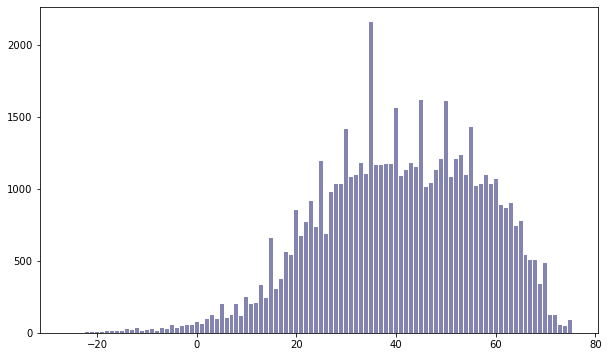

In [59]:
plt.figure(num=None, figsize=(10, 6), facecolor='w', edgecolor='k')
plt.bar(macro_df['Macro Nutrient Score'],macro_df['Count'], color = (0.2,0.2,0.5,0.6))
plt.show()

### Scaled macro-nutrient score

In [60]:
from collections import defaultdict

In [61]:
data1 = data1[pd.notnull(data1['aisle'])]

In [62]:
unique_aisle = data1['aisle'].unique()

In [63]:
len(unique_aisle.tolist())

101

In [64]:
dict_aisle = defaultdict(list)

for aisle in unique_aisle:
    aisle_type = data1[data1['aisle']==aisle]['type'].unique()
    dict_aisle[aisle] = list(aisle_type)

In [65]:
def scale_nutri(score):
    len_arr=len(score)
    score = np.reshape(score, (len_arr,1))
    scaler = MinMaxScaler()
    scaler.fit(score)
    scale_score = scaler.transform(score)
    return (np.reshape(scale_score, (1, len_arr))[0]*10)

In [3]:
scale_df = pd.DataFrame()
for aisle in dict_aisle.keys():
    aisle_type = dict_aisle[aisle]
    for val in aisle_type:
        print('processing:', aisle,val)
        aisle_df    = data1[(data1['aisle']==aisle) & (data1['type']==val)]
        macro_score = aisle_df['EWG_raw_macro_nutri_points'].values
        aisle_df['EWG_scale_macro_nutri_points']= scale_nutri(macro_score)
        aisle_df['EWG_scale_macro_nutri_points']=aisle_df['EWG_scale_macro_nutri_points'].map(round)
        scale_df = pd.concat([scale_df, aisle_df])

In [67]:
fileName = 'Datasets/Nutrition/Nutrition Data Consolidated (James)_August_15_with_type.csv'#'Nutrition Data Consolidated with additional attributesV1.csv' #latest file
data_org      = pd.read_csv(path+fileName)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (109,111,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
# scale_df.columns
sel_cols = list(data_org.columns) + ['EWG_scale_macro_nutri_points']
scale_df[sel_cols].to_csv(path+'Datasets/Nutrition/Nutrition Data Consolidated (James)_type_EWG.csv', index=False)

In [59]:
savePath = 'C:/Users/SSK/Documents/UC - MScA/Courses/Capstone/NutritionScores/'
scale_df.to_csv(savePath+'EWG_score.csv', index=False)

In [88]:
# scale_df
my_df = pd.DataFrame()

In [93]:
scale_df[scale_df.name == "spinach & cheese ravioli"]

,Unnamed: 0,Index,ID,name,scrape_name,Source,Sub_food_category,Main_food_category,department,aisle,...,Tag_syrup,Tag_hydrogenated,Tag_preservative,Tag_concentrate,Tag_organic,Tag_artificial,Tag_omega,All_Tag_score,EWG_raw_macro_nutri_points,EWG_scale_macro_nutri_points
36043,31213,7749,7749,spinach & cheese ravioli,spinach ravioli - 1 large piece,Nutritionix,NaN,NaN,frozen,frozen meals,...,0,0,0,0,0,0,0,0,41,6


In [80]:
scale_df[scale_df.name == "lobster ravioli"]

,Unnamed: 0,Index,ID,name,scrape_name,Source,Sub_food_category,Main_food_category,department,aisle,...,Tag_syrup,Tag_hydrogenated,Tag_preservative,Tag_concentrate,Tag_organic,Tag_artificial,Tag_omega,All_Tag_score,EWG_raw_macro_nutri_points,EWG_scale_macro_nutri_points
33221,51729,28365,28365,lobster ravioli,lobster ravioli - 1 cup,Nutritionix,NaN,NaN,dry goods pasta,fresh pasta,...,0,0,0,0,0,0,0,0,38,5


# EDA 

In [72]:
df = copy.deepcopy(scale_df)

In [73]:
food_score = df.loc[:,["name","department","aisle","EWG_scale_macro_nutri_points"]]

In [74]:
aisle_list = food_score.aisle.unique().tolist()
dep_list   = food_score.department.unique().tolist()

In [75]:
food_score[food_score.EWG_scale_macro_nutri_points == 1].tail()

,name,department,aisle,EWG_scale_macro_nutri_points
57727,organic granulated garlic parsley,pantry,spices seasonings,1
57882,chopped garlic,pantry,spices seasonings,1
57692,chili sauce sriracha,pantry,spices seasonings,1
57377,cinnamon whole,pantry,spices seasonings,1
57595,hollandaise sauce mix original,pantry,spices seasonings,1


In [76]:
food_score[food_score.EWG_scale_macro_nutri_points == 10].tail()

,name,department,aisle,EWG_scale_macro_nutri_points
57384,real salt coarse sea salt,pantry,spices seasonings,10
57835,coarse pink salt,pantry,spices seasonings,10
57284,original herbamare infused sea salt,pantry,spices seasonings,10
57405,sea salt flakes original,pantry,spices seasonings,10
57869,coriander,pantry,spices seasonings,10


In [77]:
def plot_barplot_aisle(df,aisle_name):
    df = df[df.aisle == aisle_name]
    score_count = df.EWG_scale_macro_nutri_points.value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(score_count.index, score_count.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Nutrition_Score', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(aisle_name)
    plt.show()
    
    
def plot_boxplot_aisle(df,aisle_name):
    df = df[df.aisle == aisle_name]
    plt.figure(figsize=(10,5))
    sns.boxplot(df.EWG_scale_macro_nutri_points)
    plt.xlabel('Nutrition_Score', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(aisle_name)
    plt.show()
    
def plot_barplot_dep(df,dep_name):
    df = df[df.department == dep_name]
    score_count = df.EWG_scale_macro_nutri_points.value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(score_count.index, score_count.values)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Nutrition_Score', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(dep_name)
    plt.show()
    
def plot_boxplot_dep(df,dep_name):
    df = df[df.department == dep_name]
    plt.figure(figsize=(10,5))
    sns.boxplot(df.EWG_scale_macro_nutri_points)
    plt.xlabel('Nutrition_Score', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(dep_name)
    plt.show()

### Score distribution of each aisle 

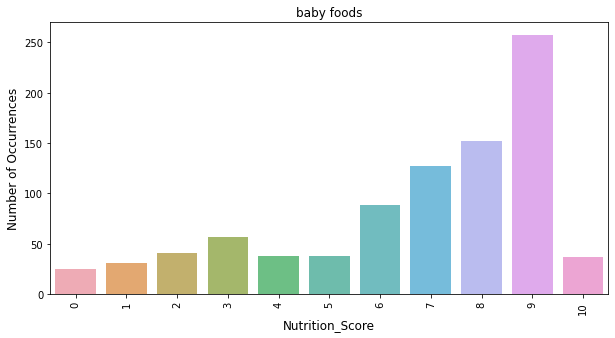

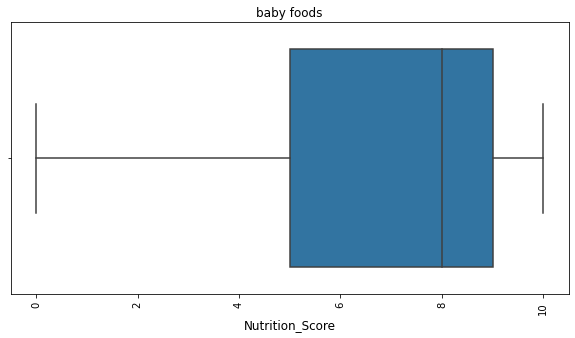

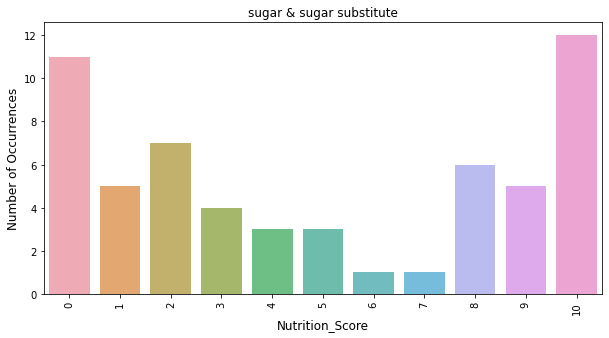

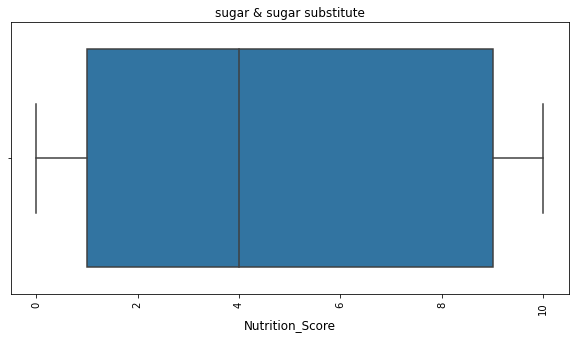

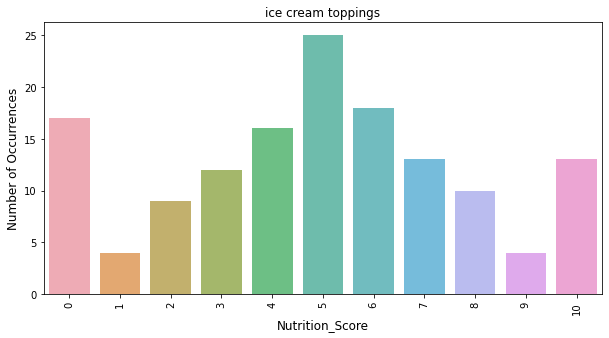

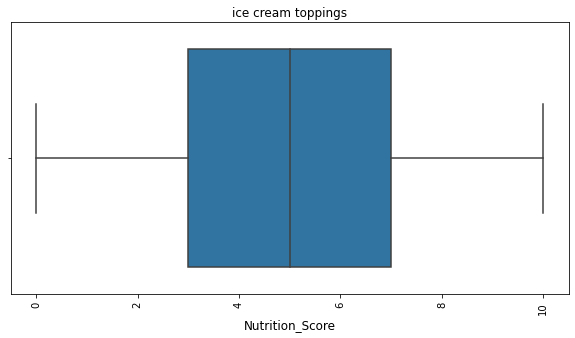

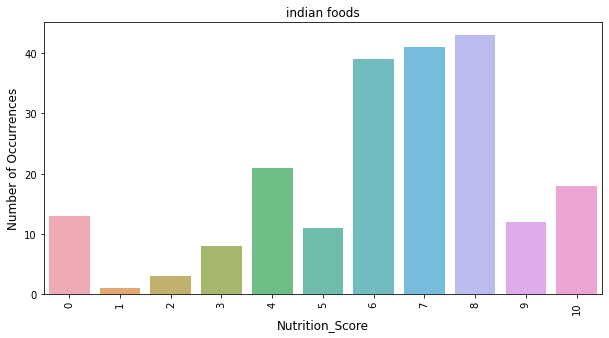

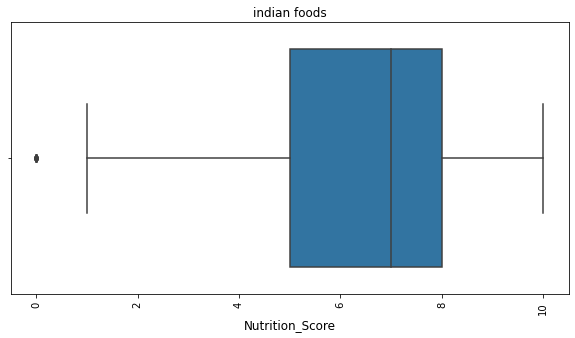

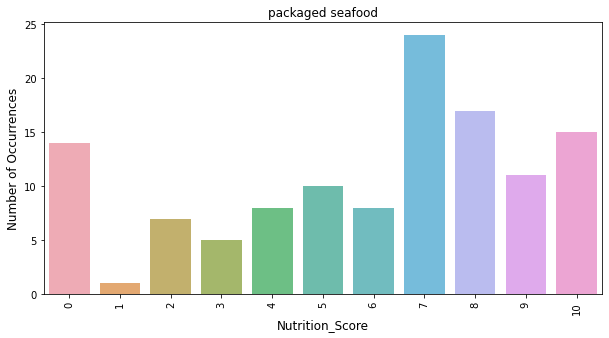

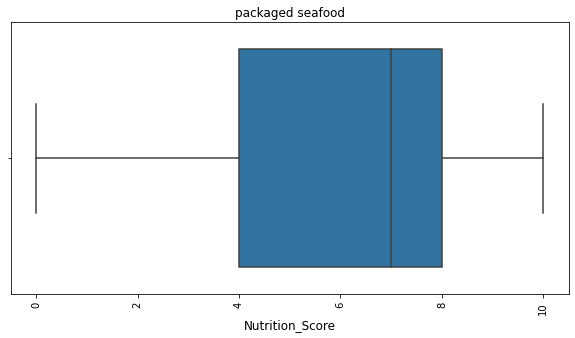

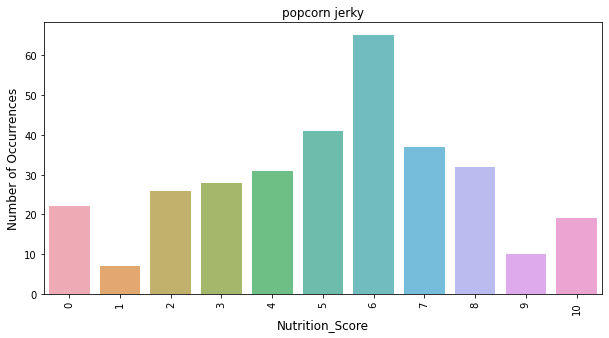

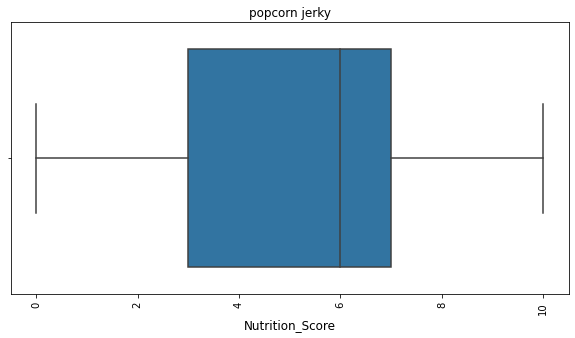

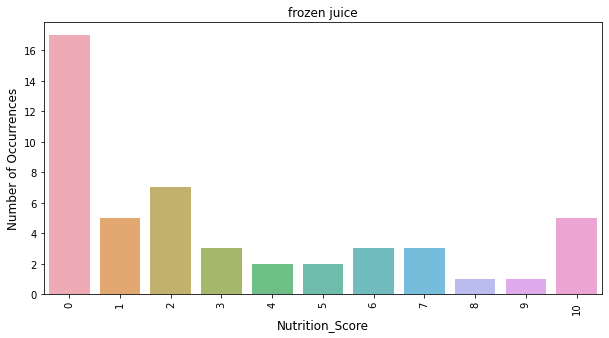

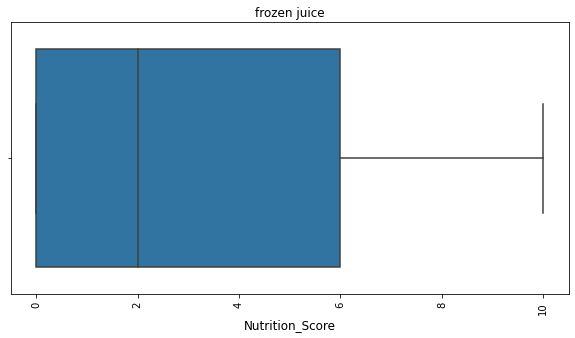

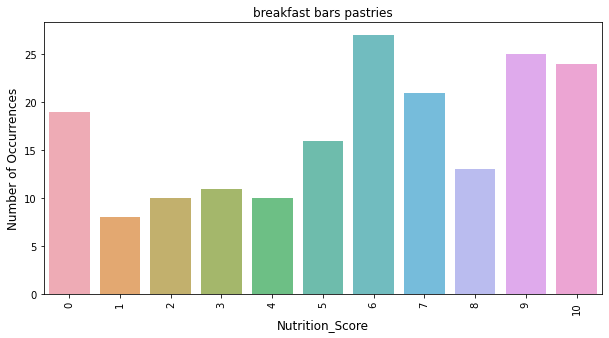

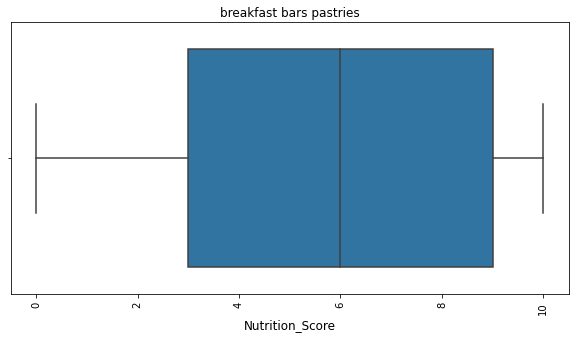

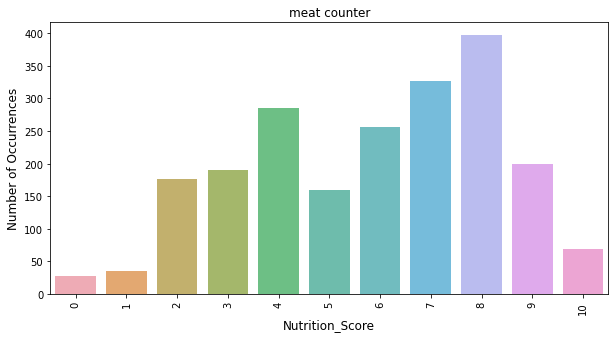

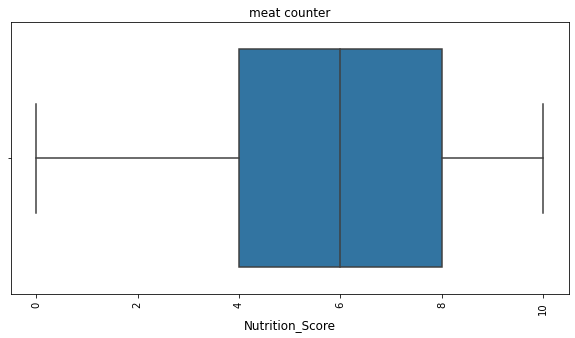

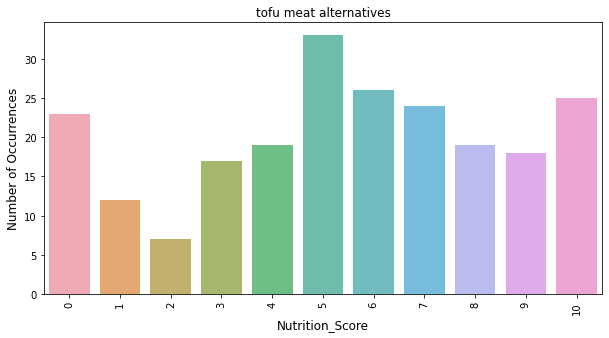

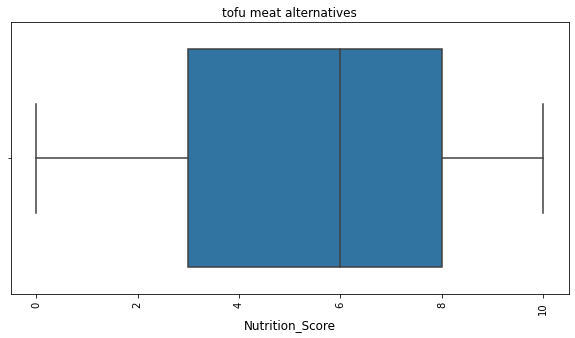

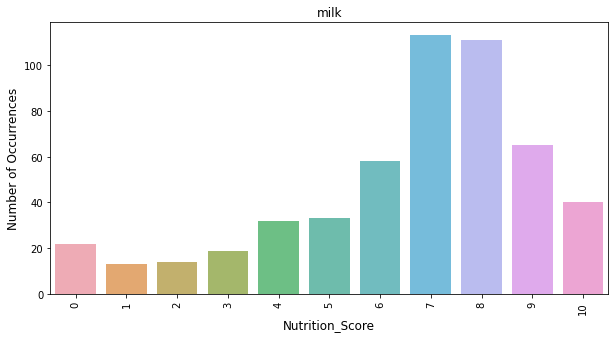

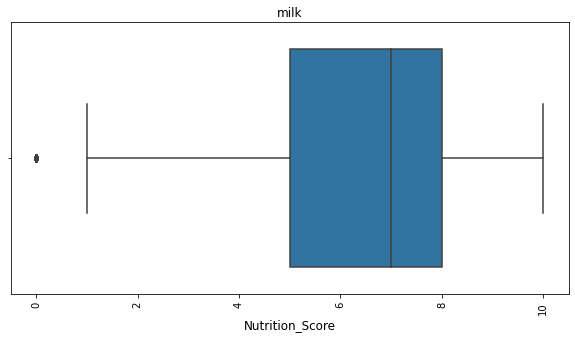

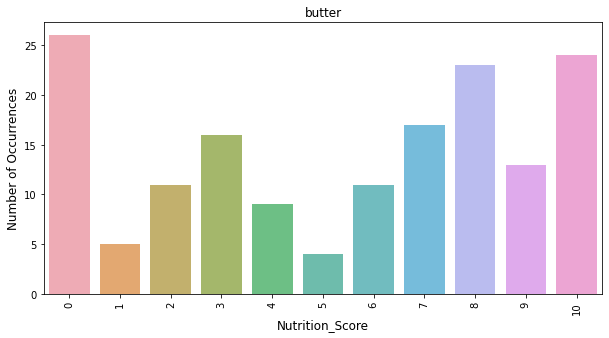

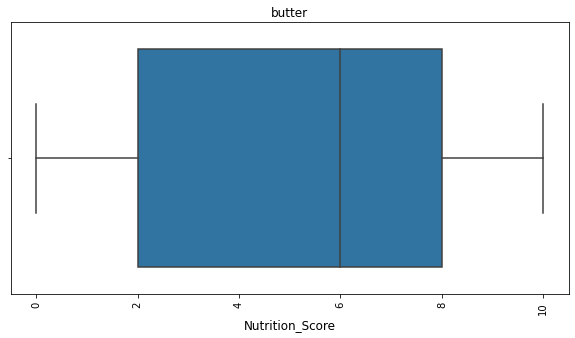

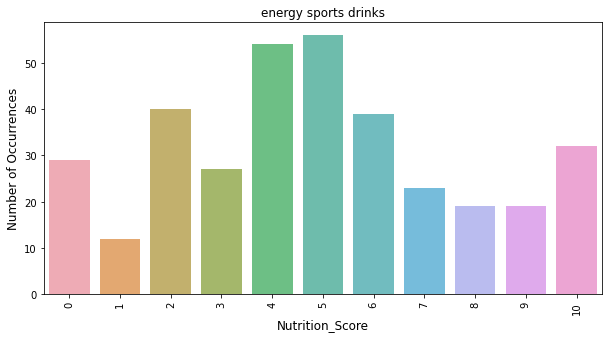

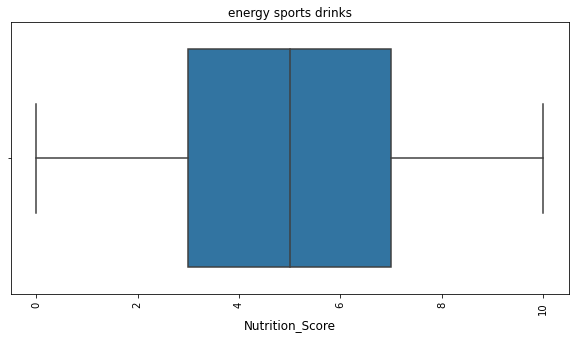

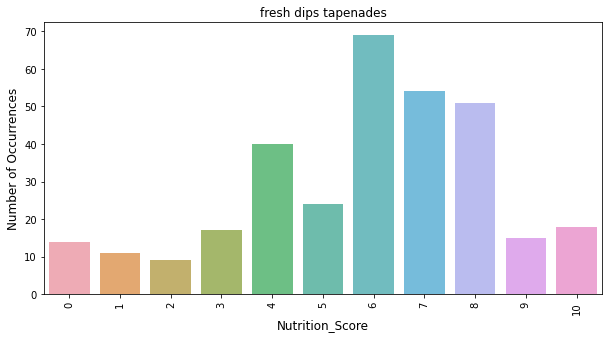

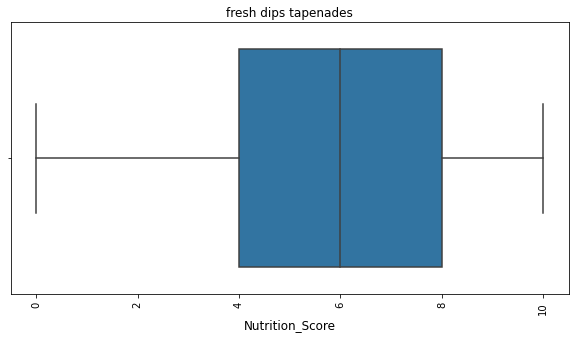

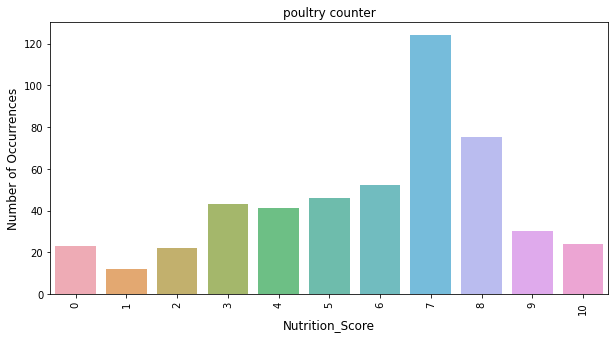

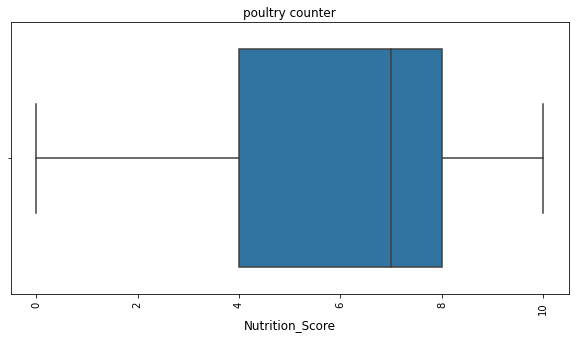

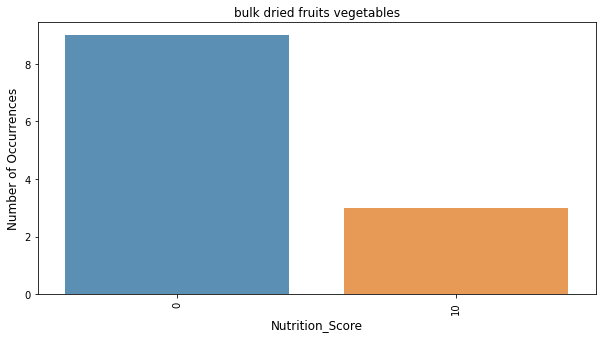

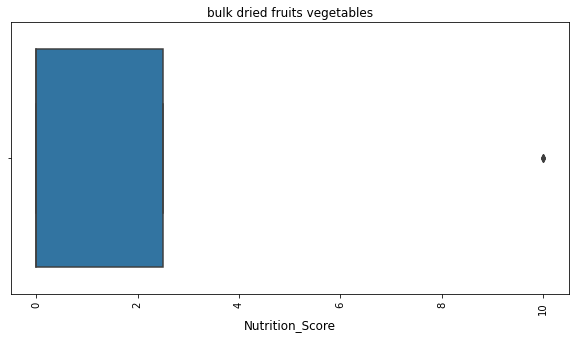

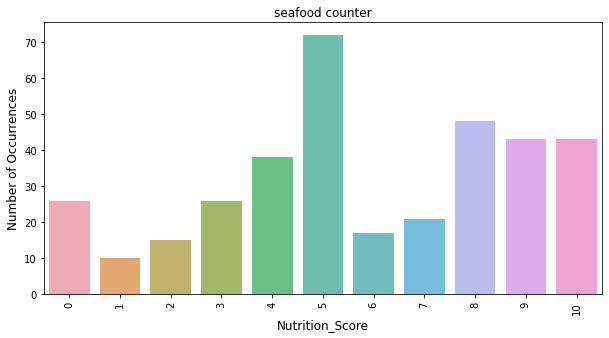

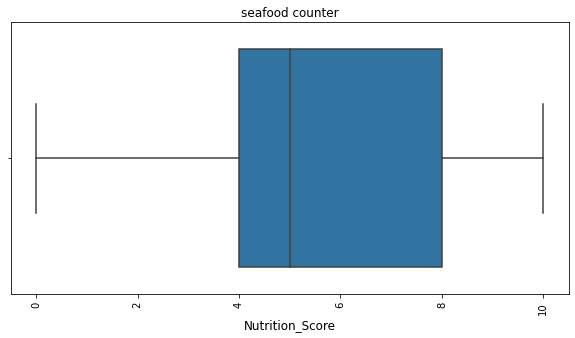

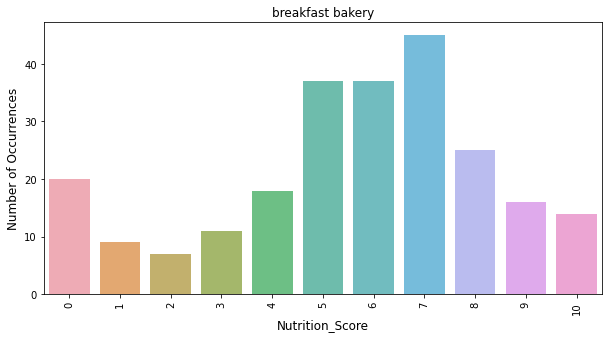

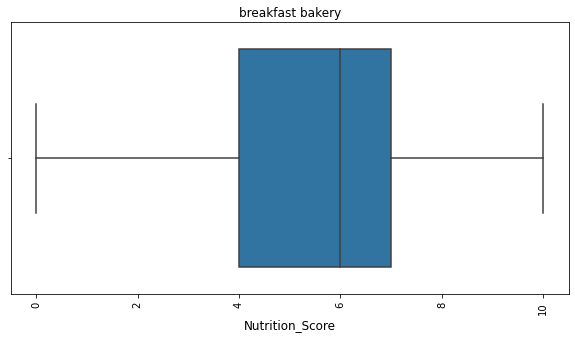

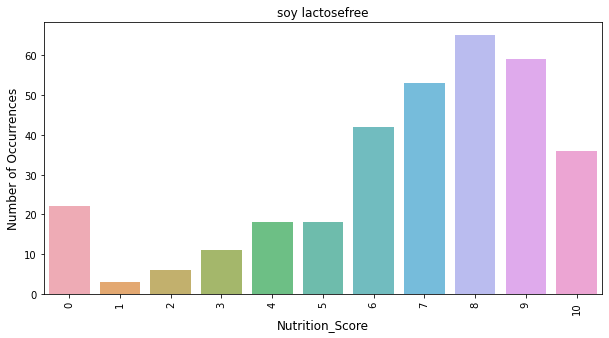

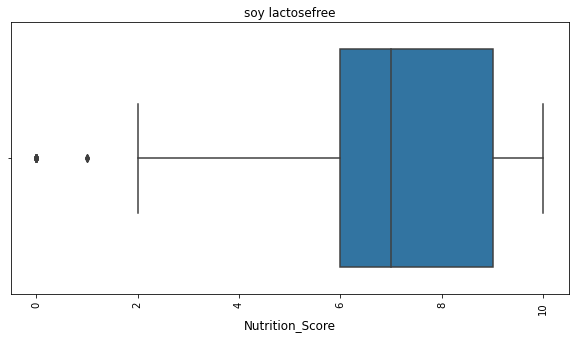

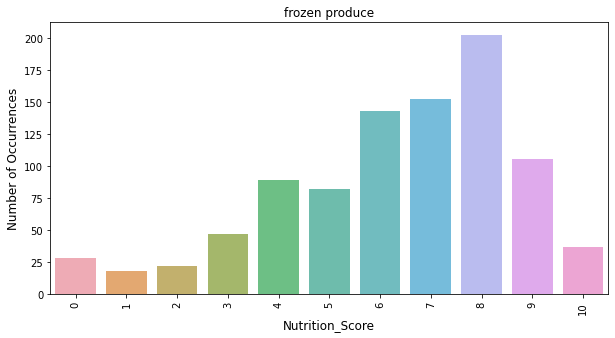

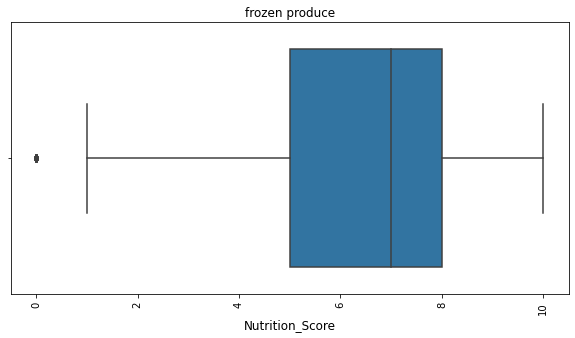

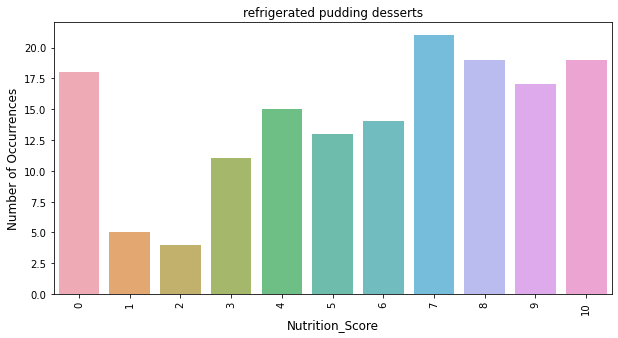

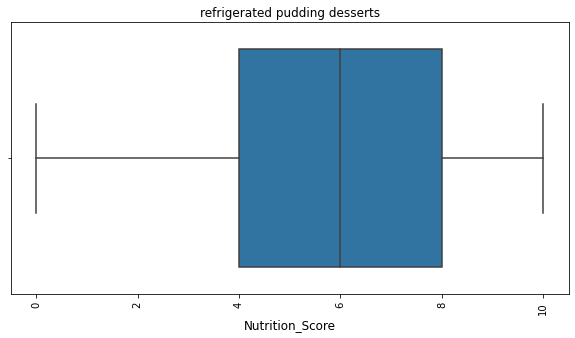

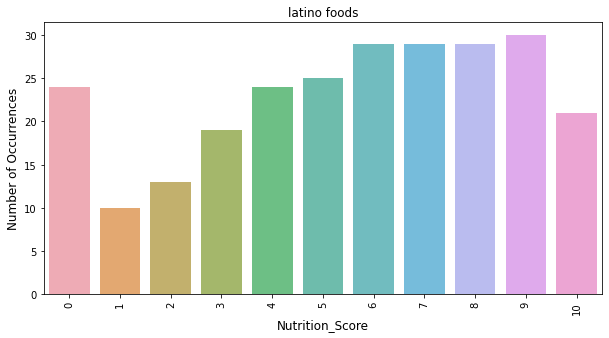

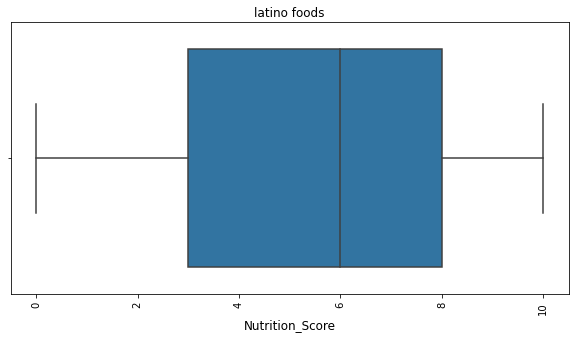

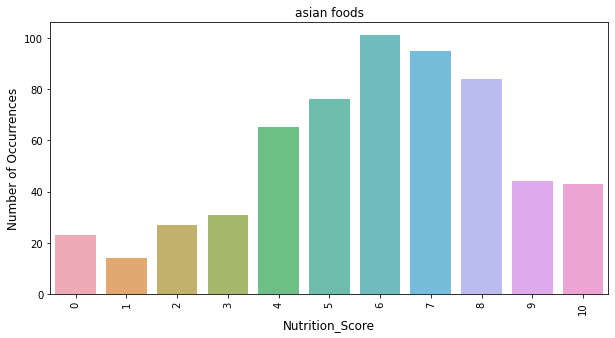

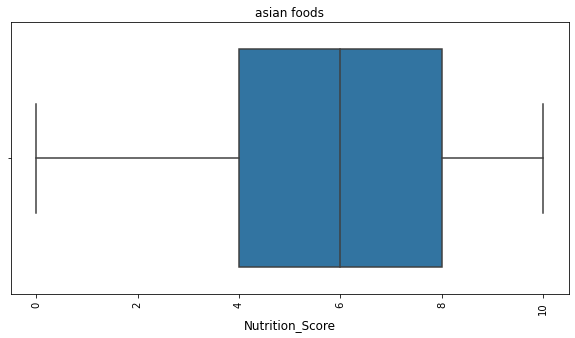

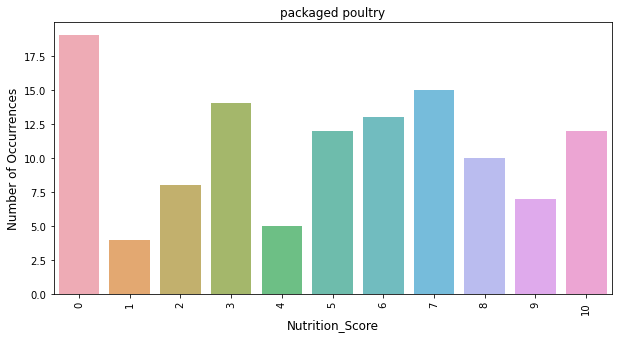

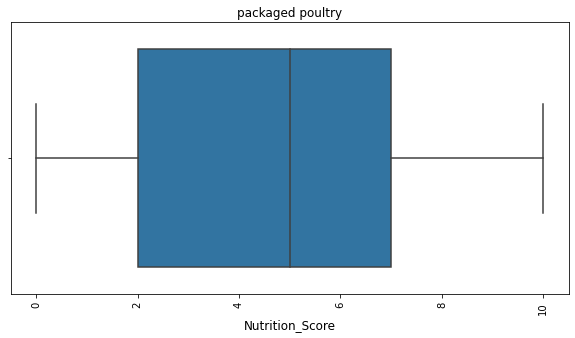

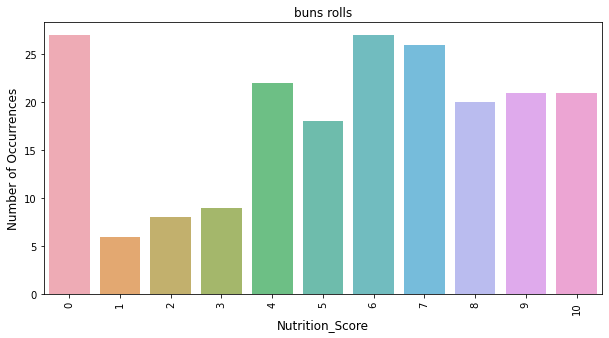

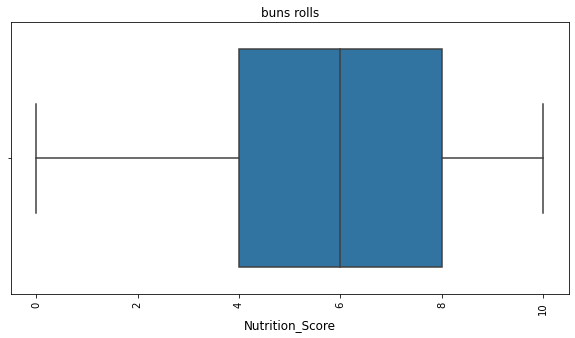

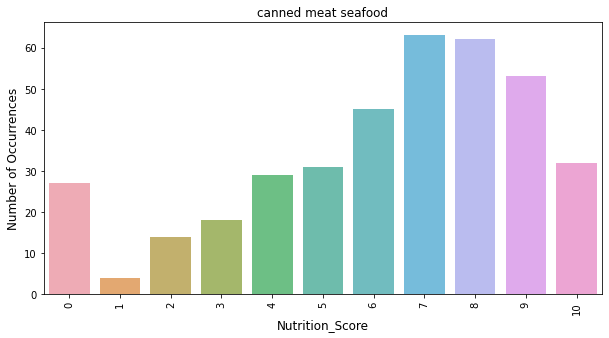

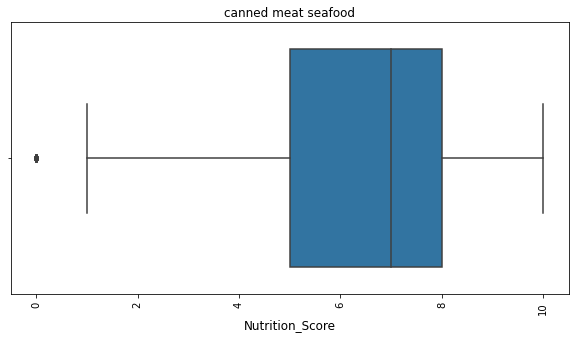

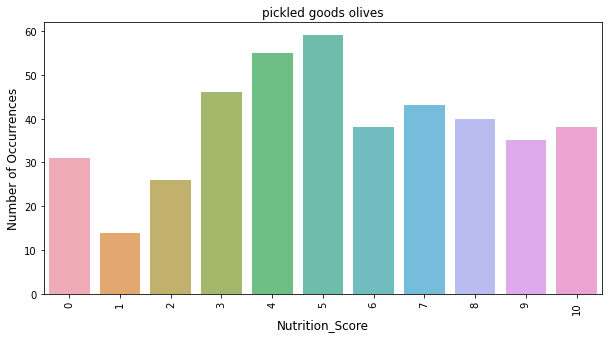

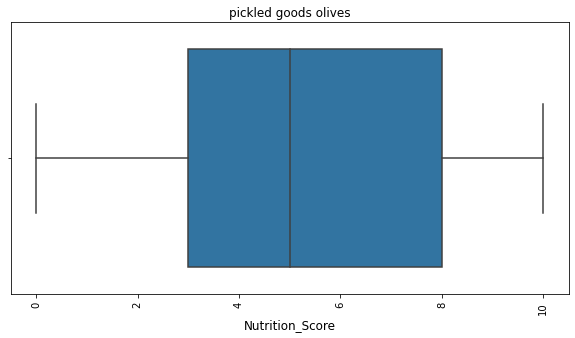

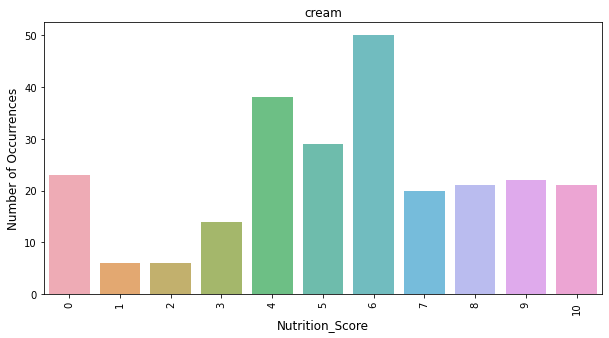

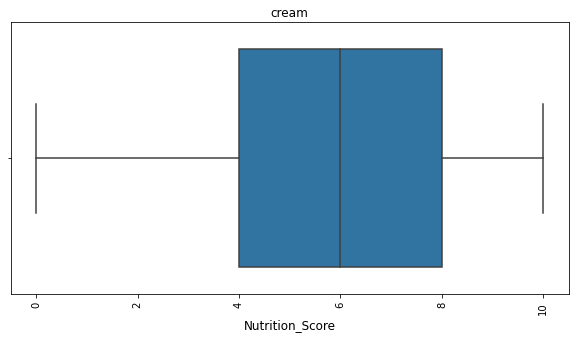

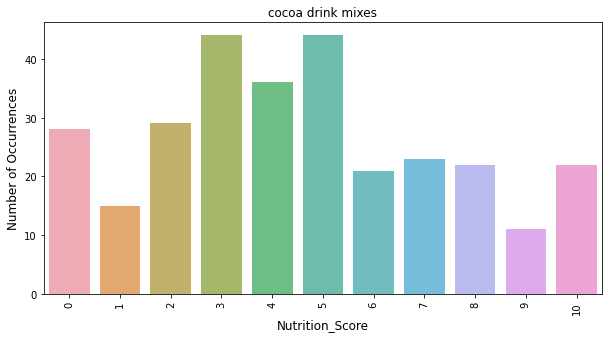

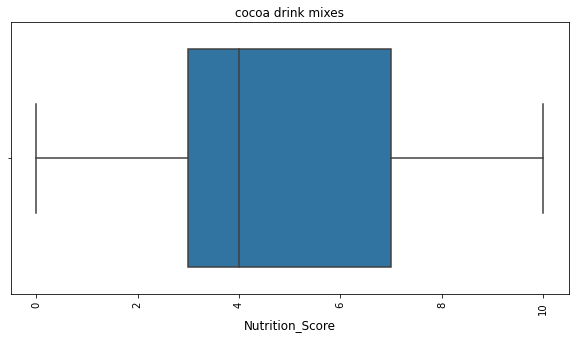

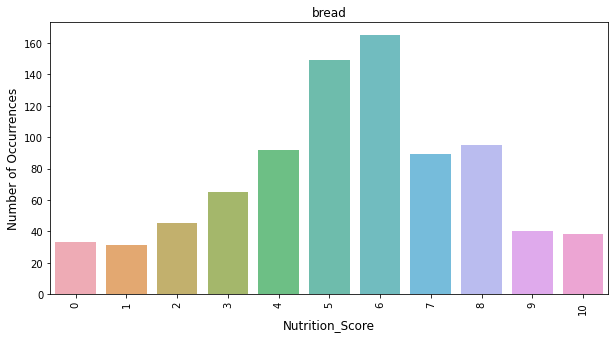

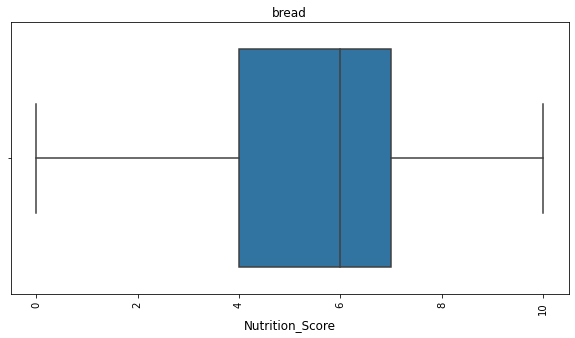

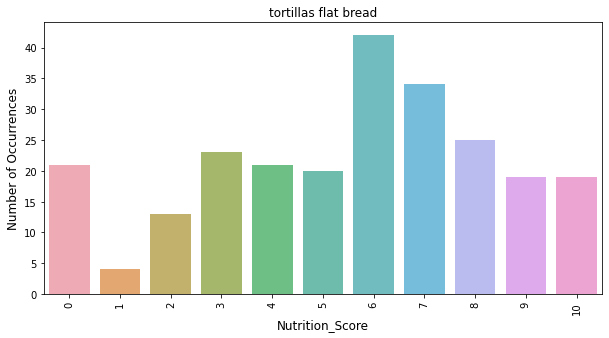

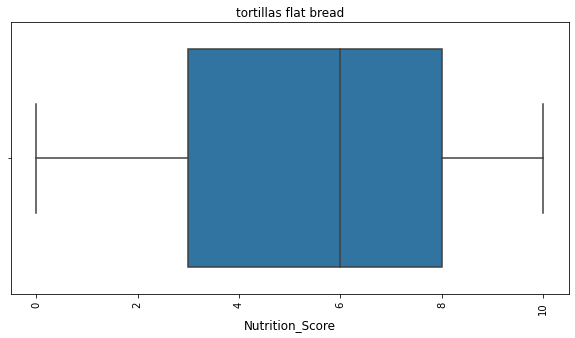

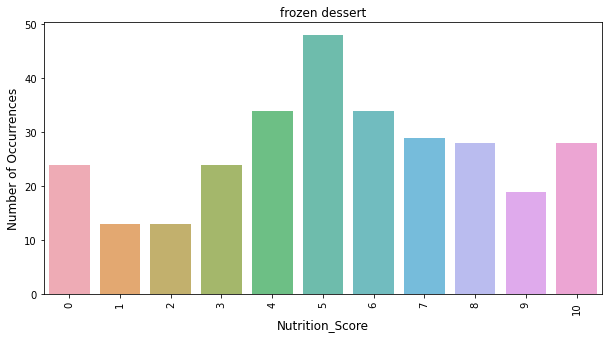

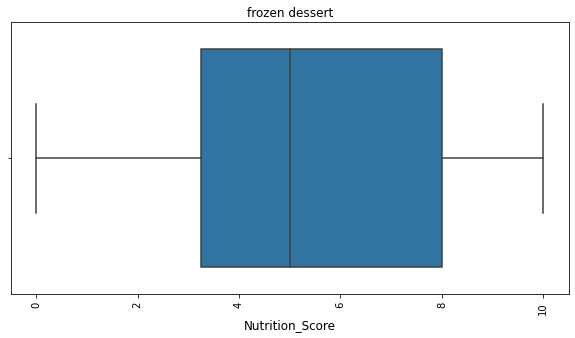

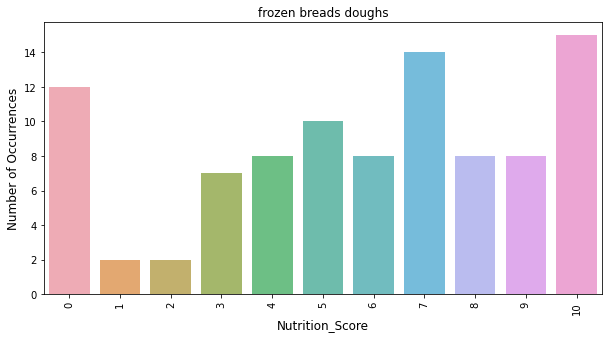

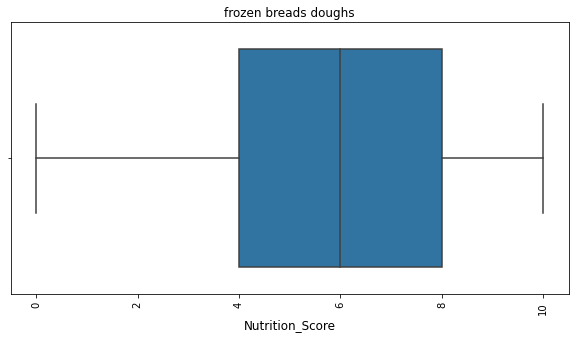

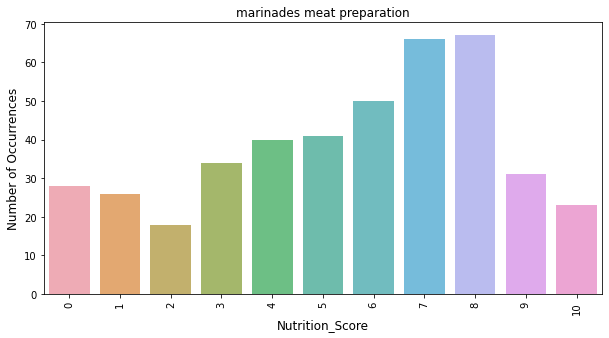

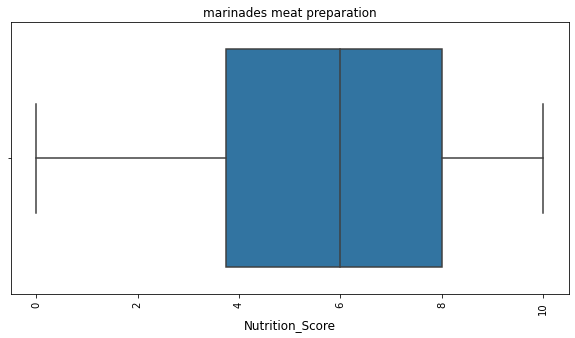

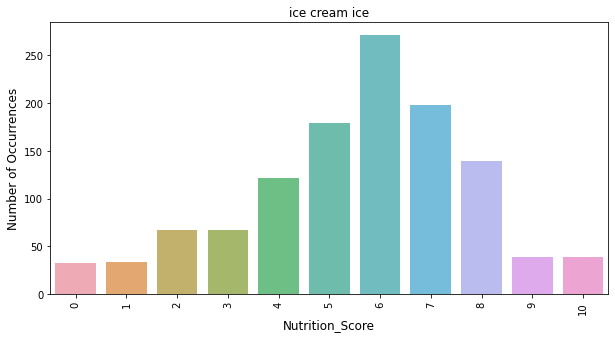

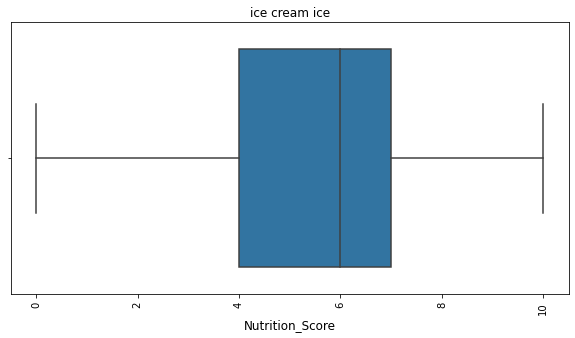

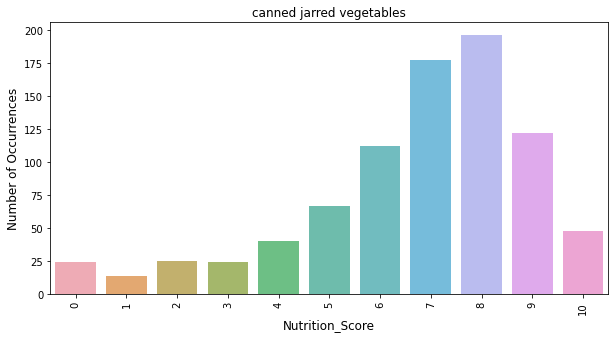

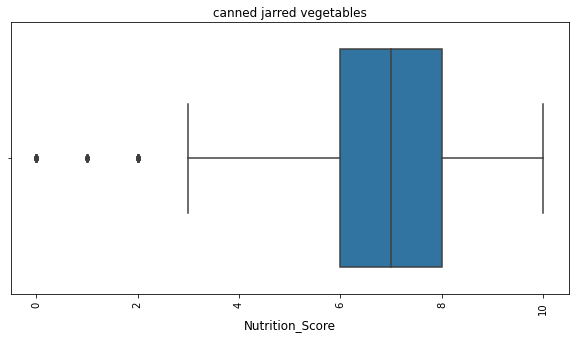

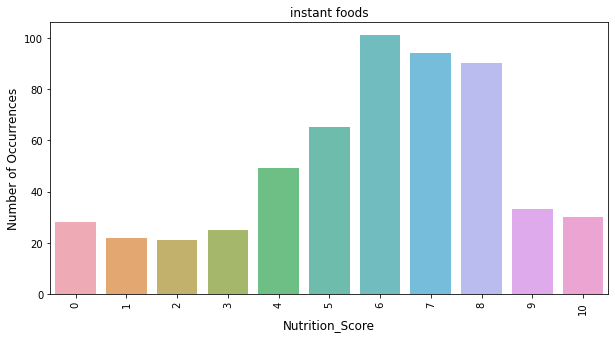

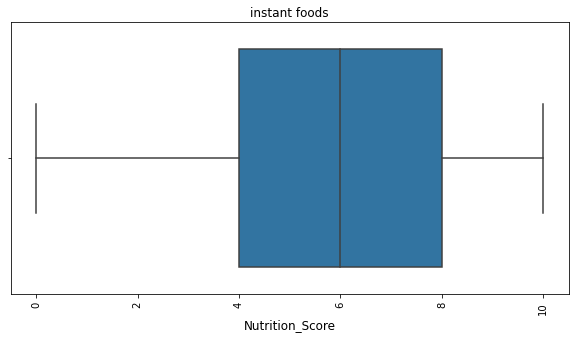

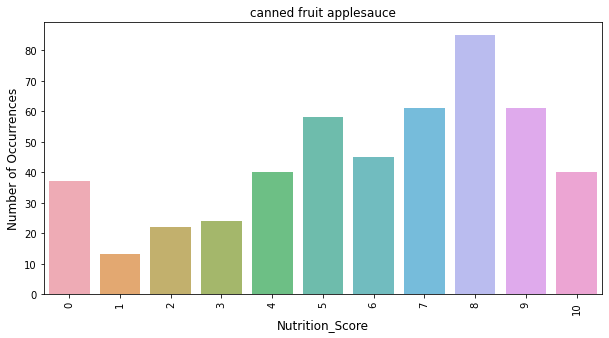

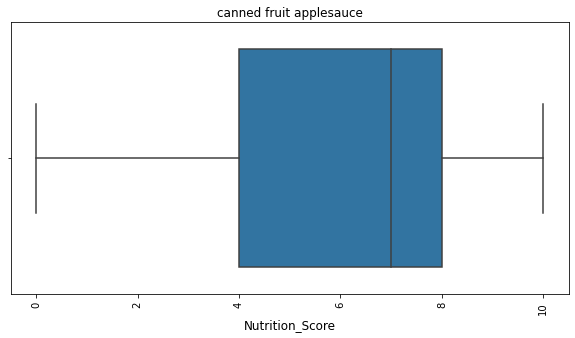

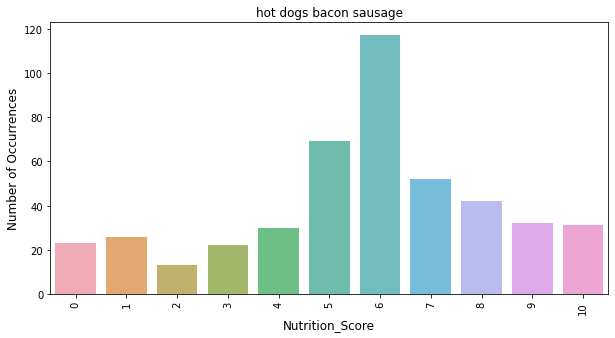

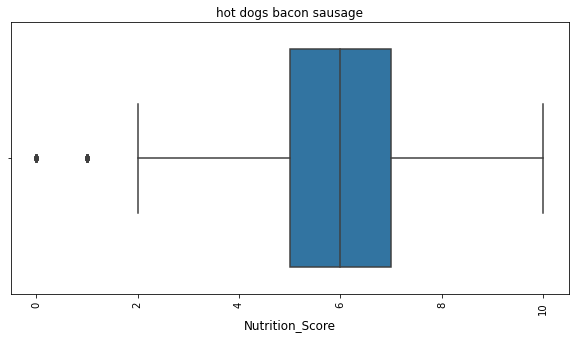

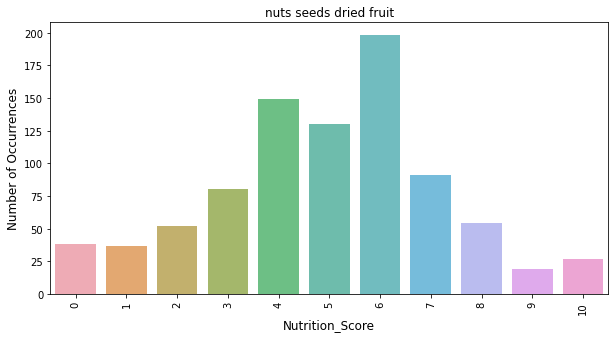

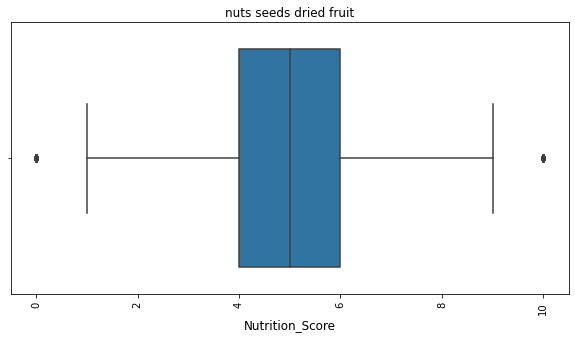

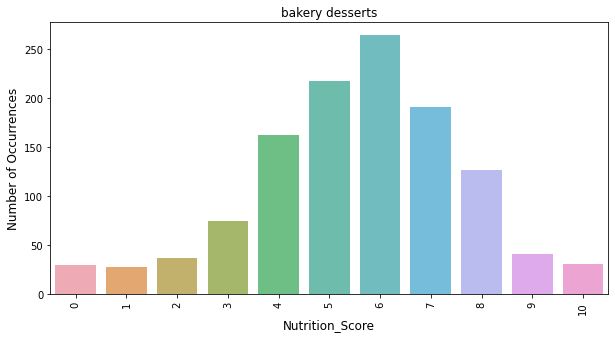

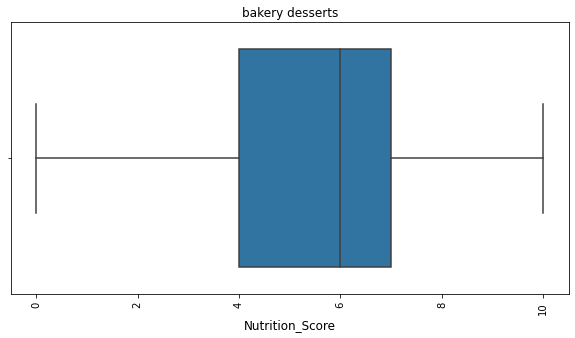

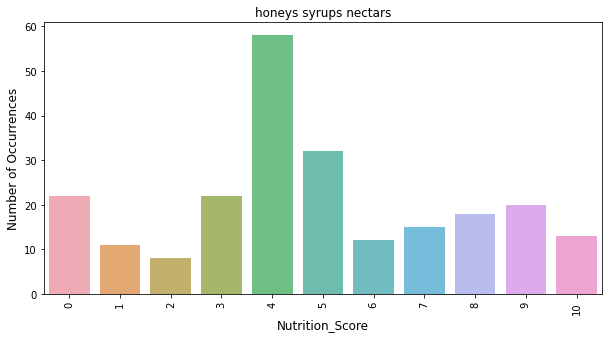

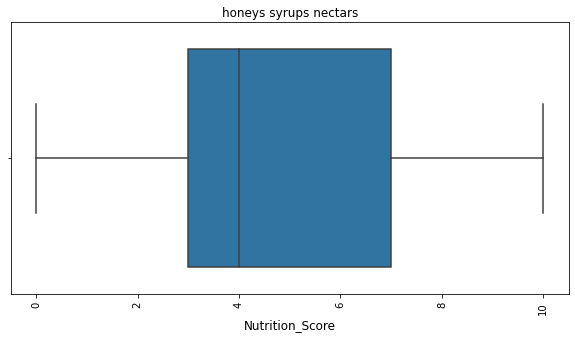

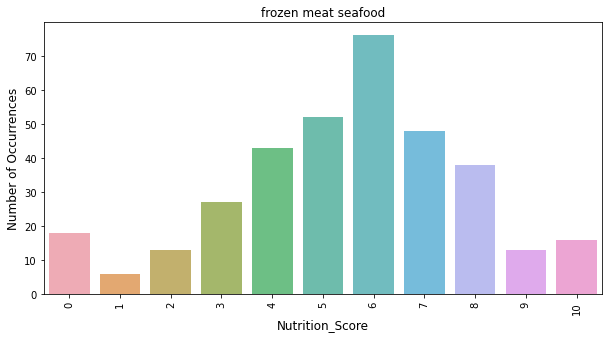

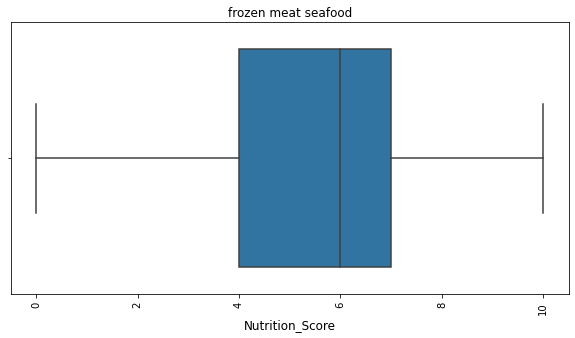

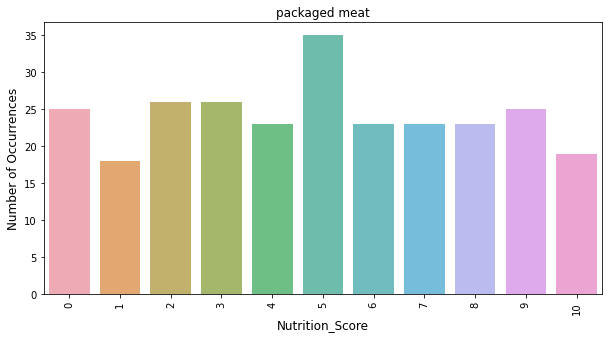

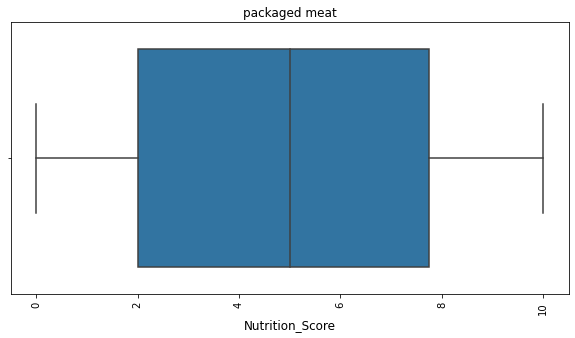

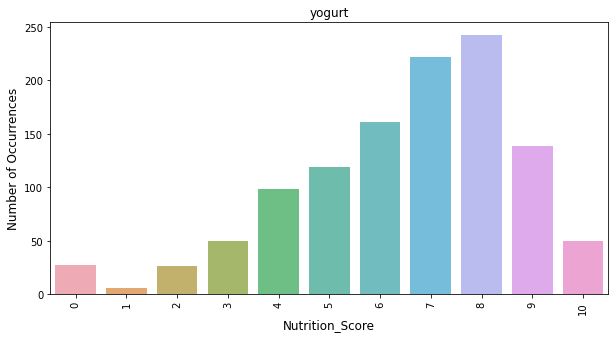

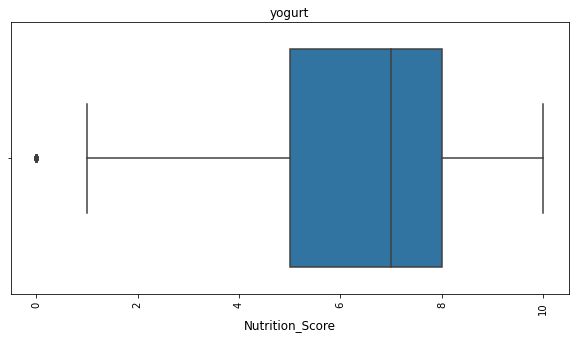

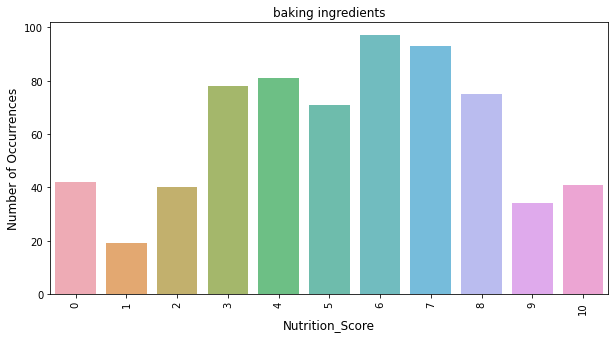

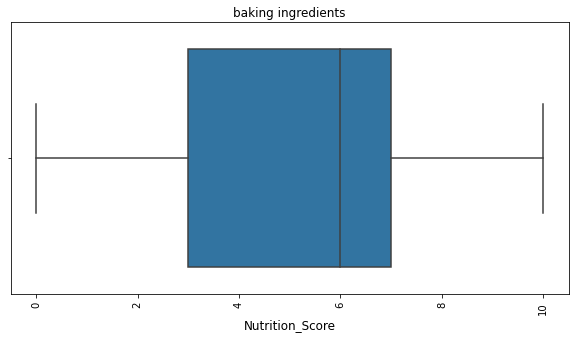

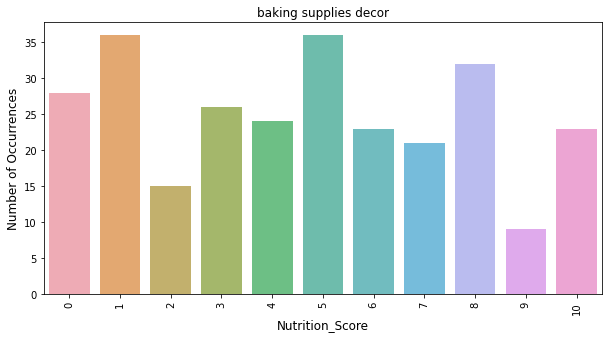

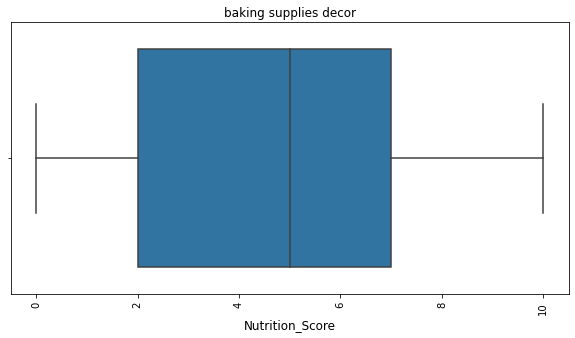

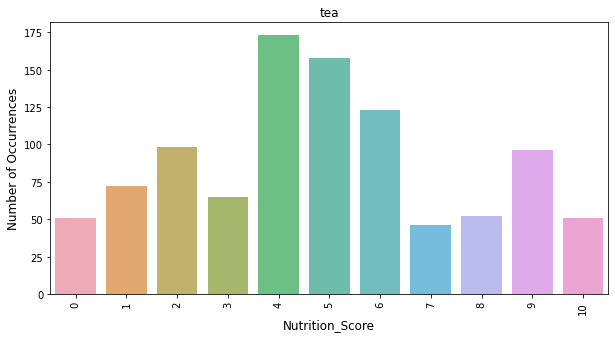

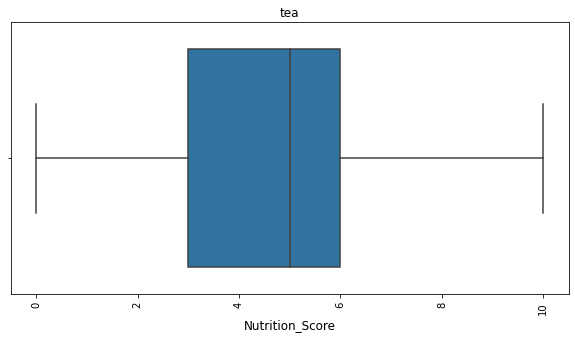

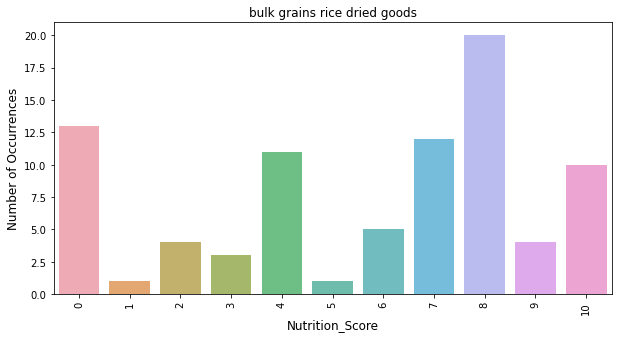

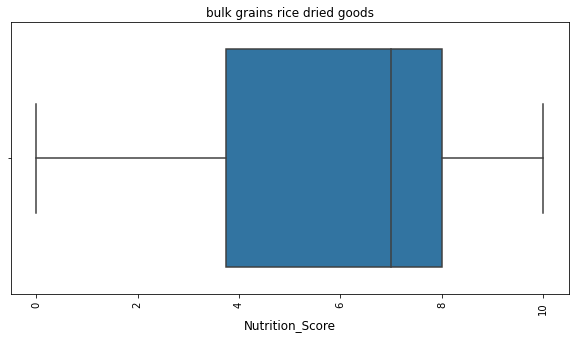

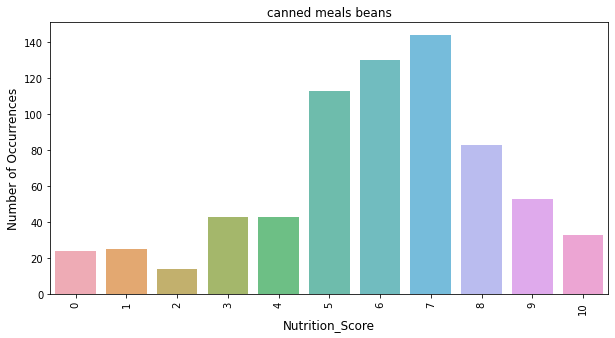

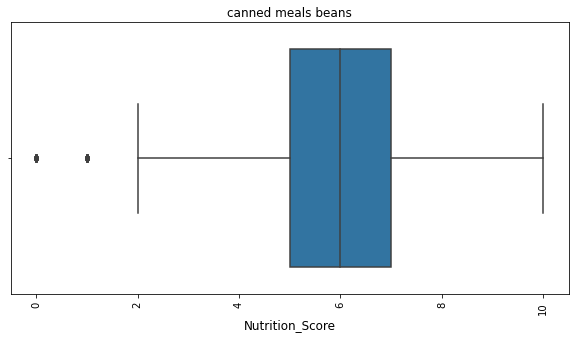

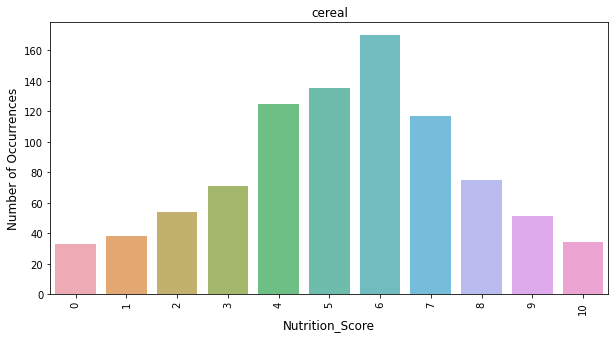

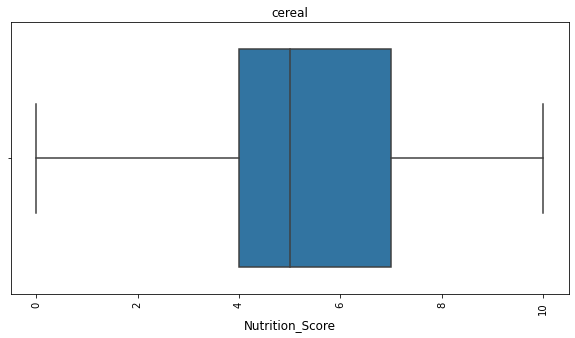

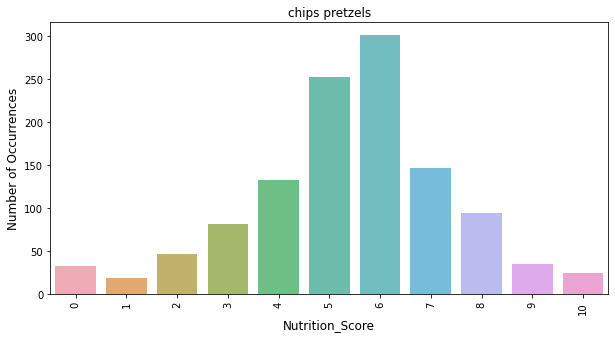

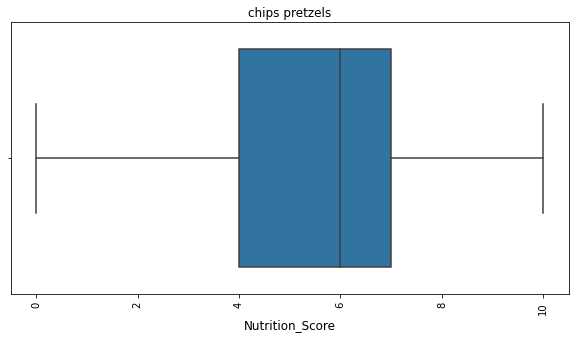

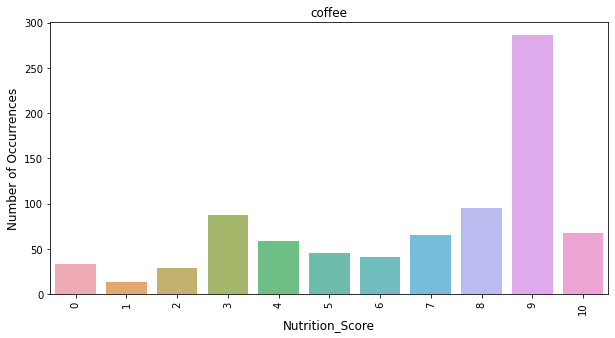

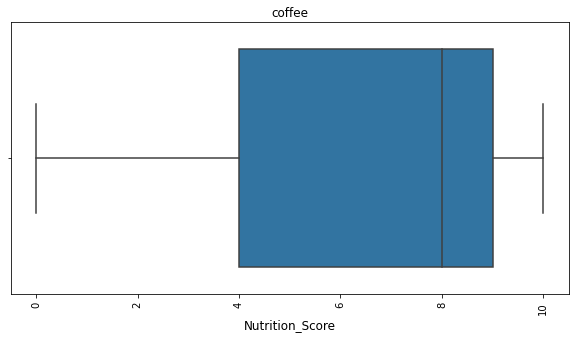

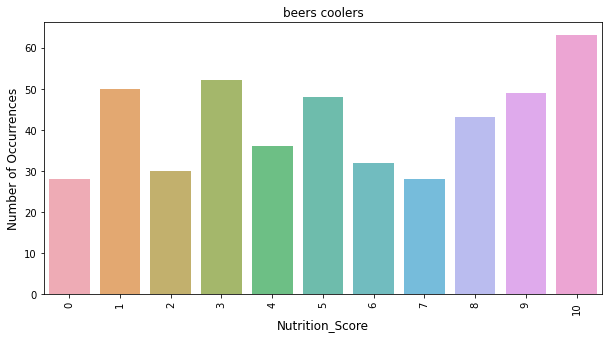

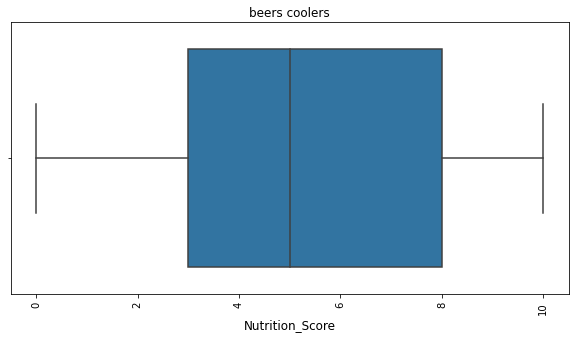

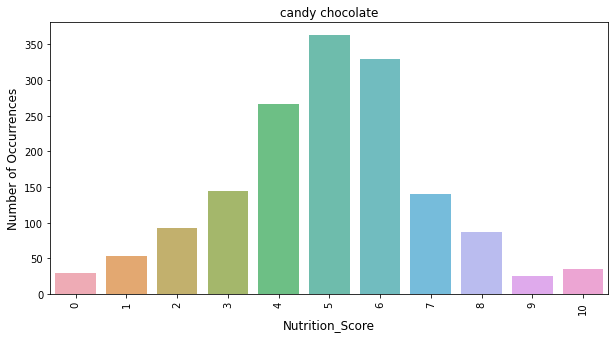

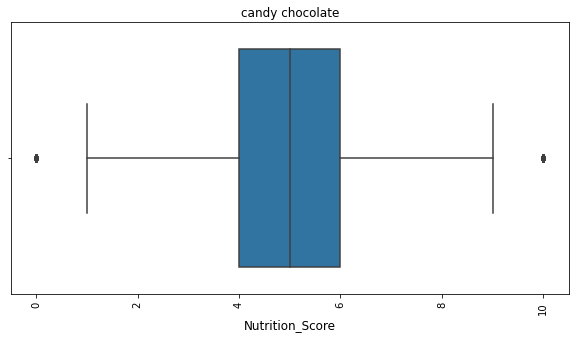

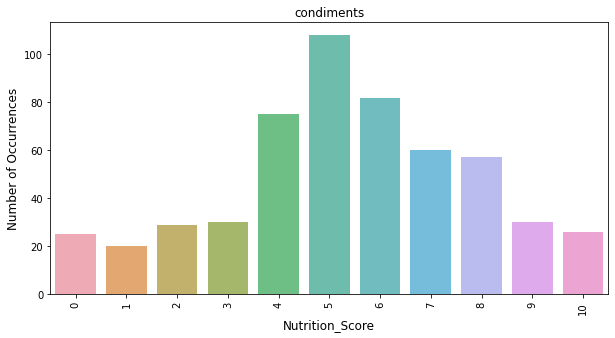

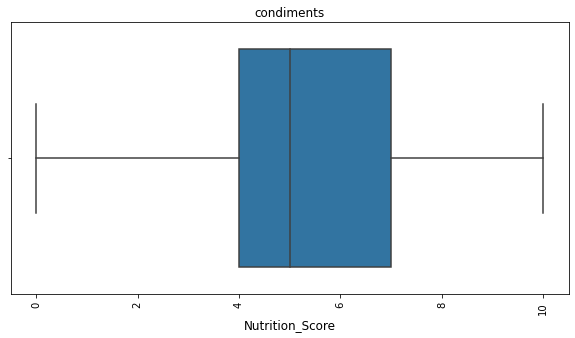

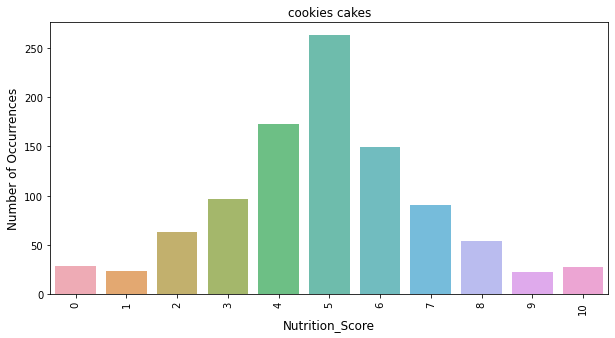

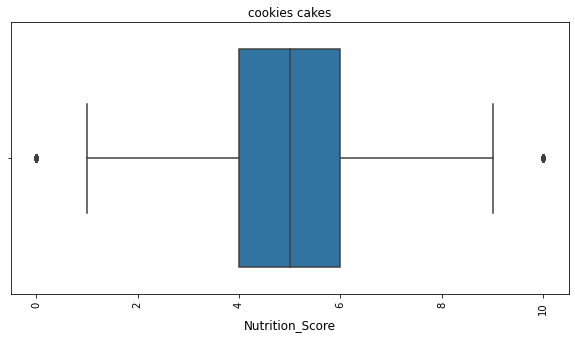

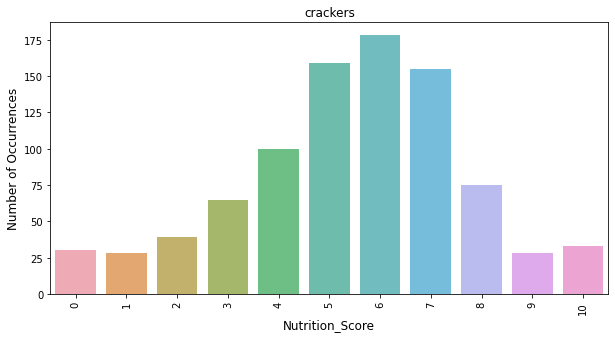

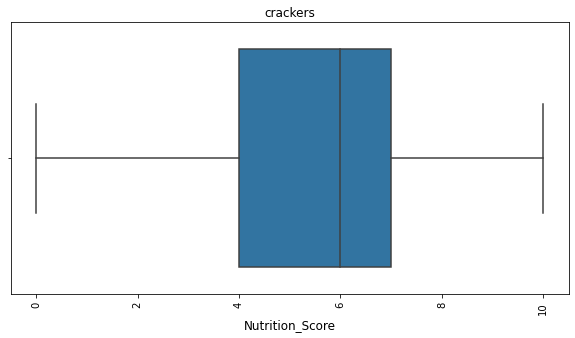

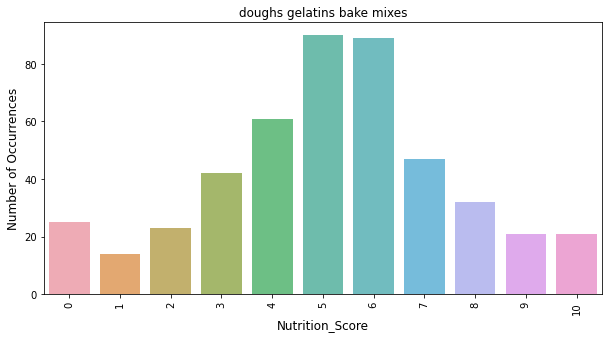

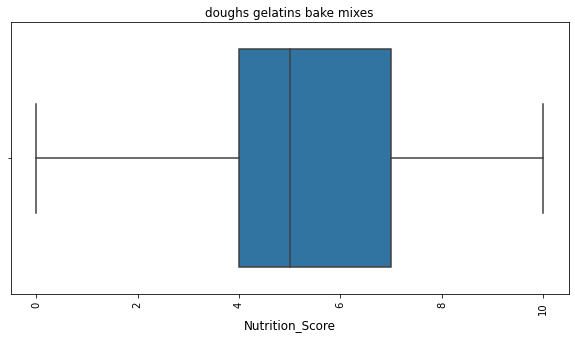

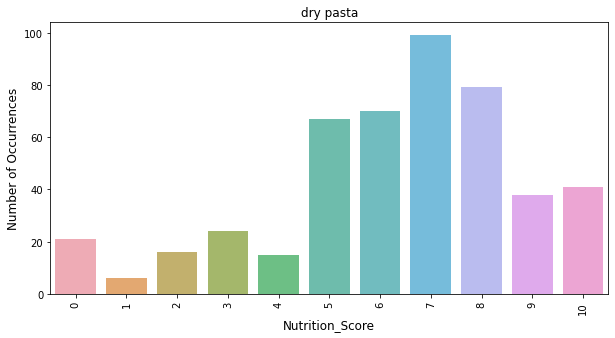

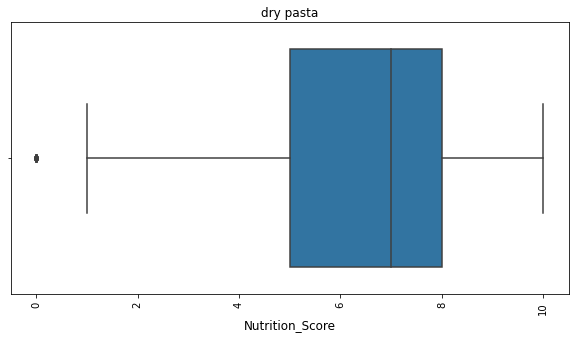

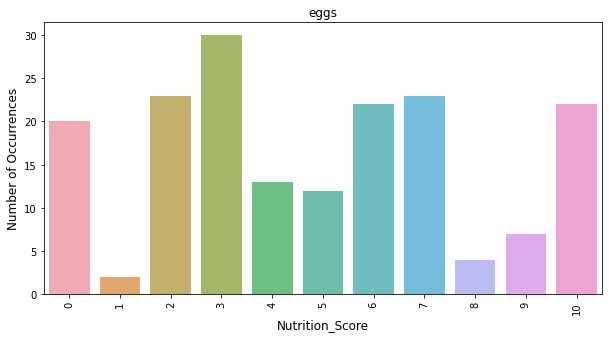

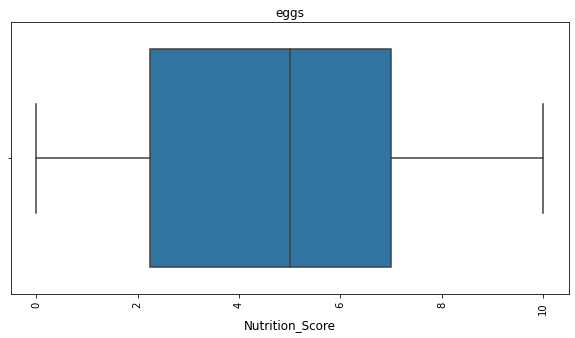

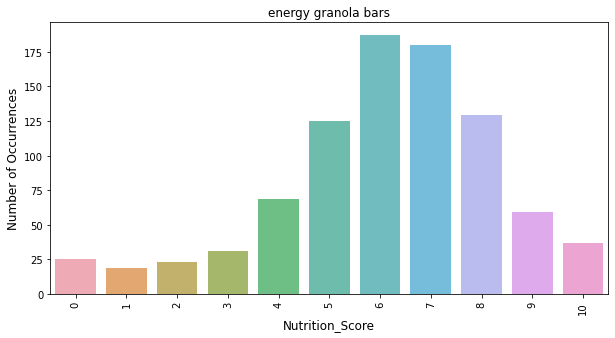

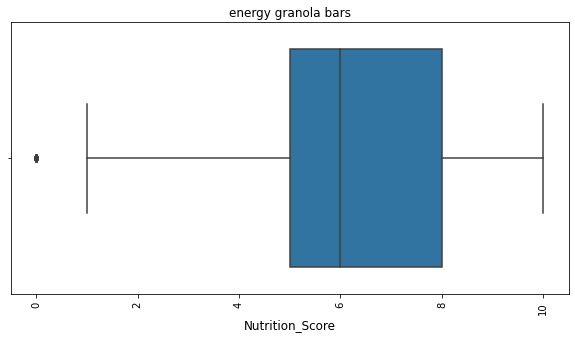

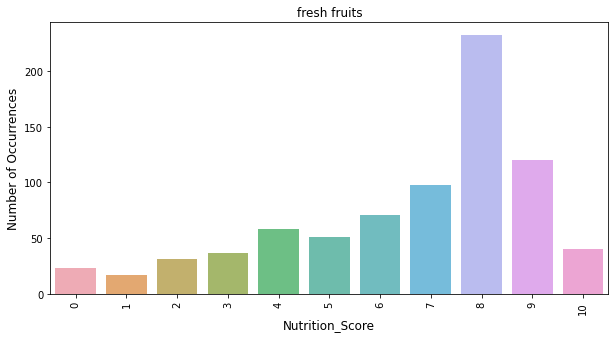

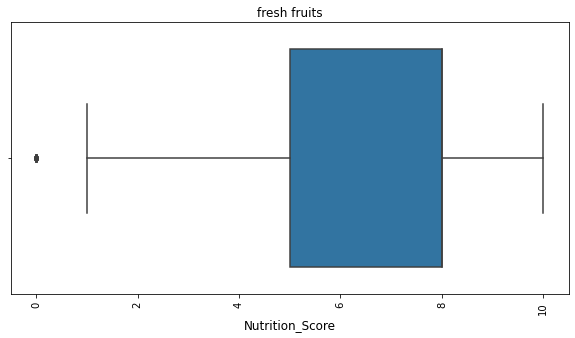

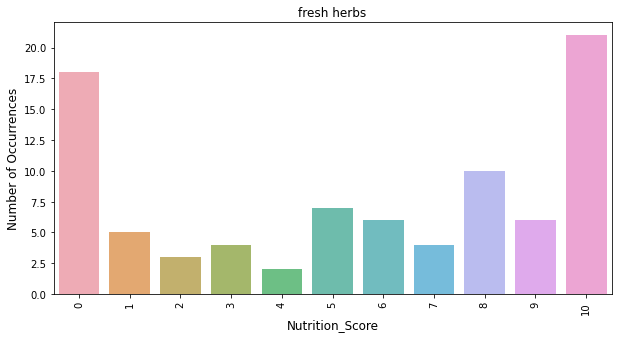

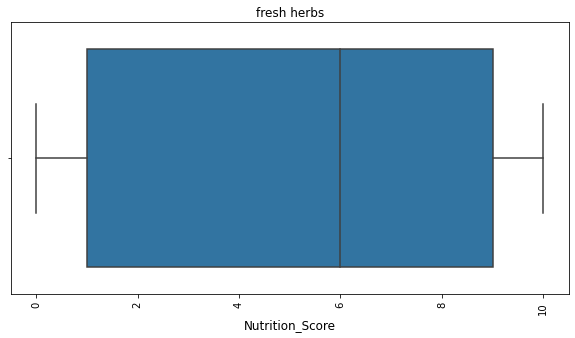

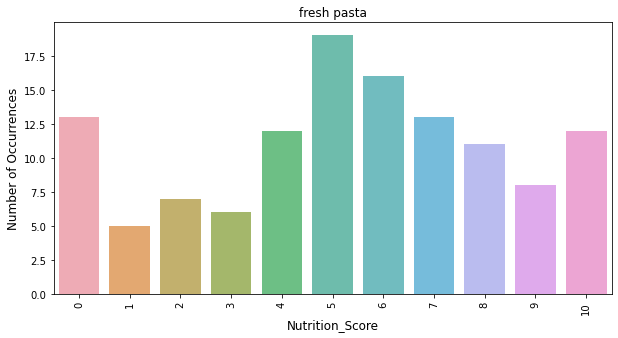

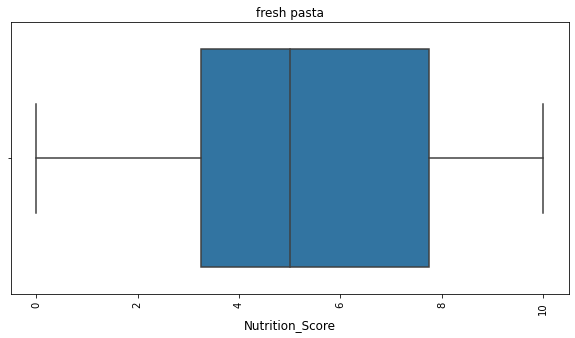

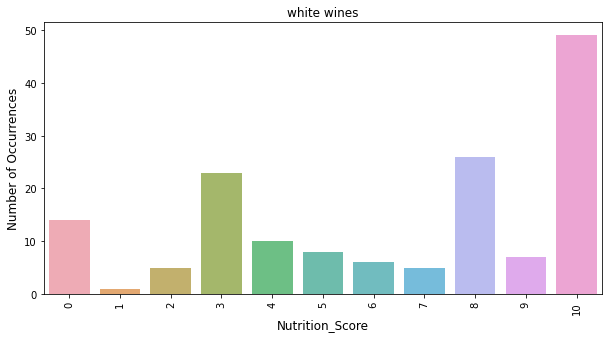

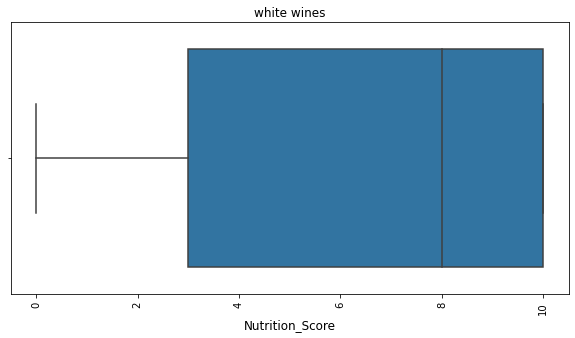

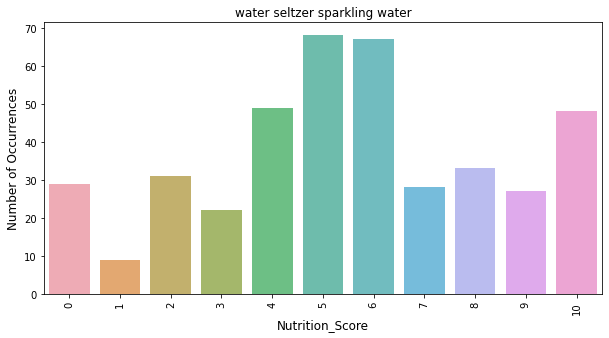

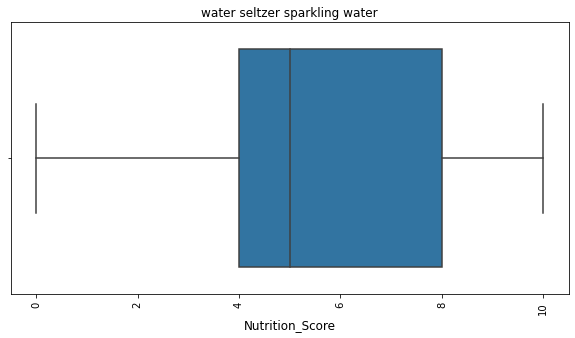

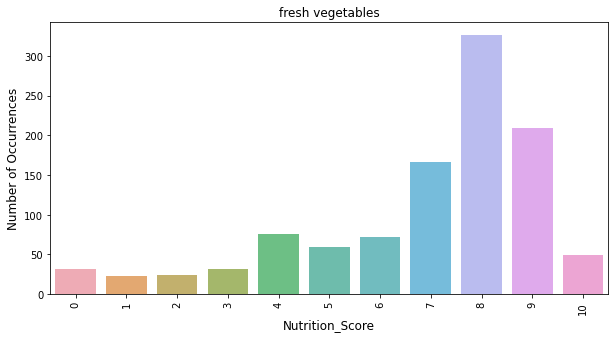

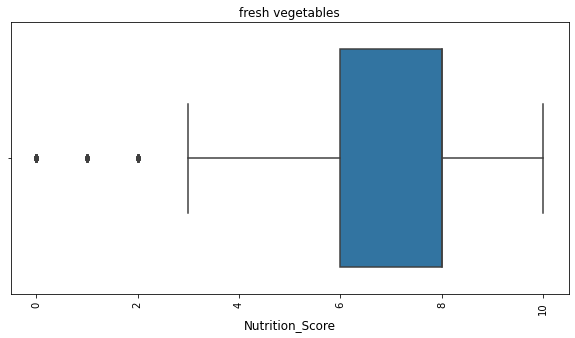

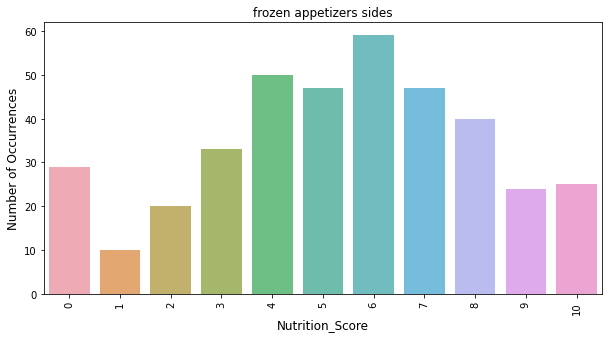

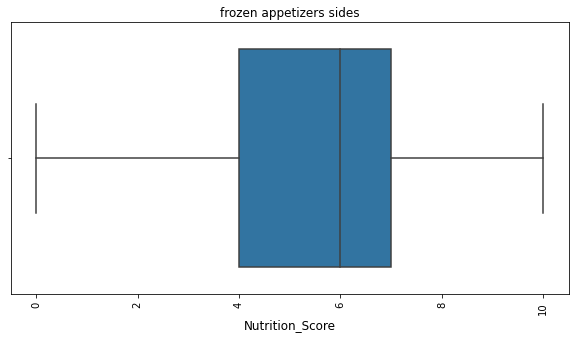

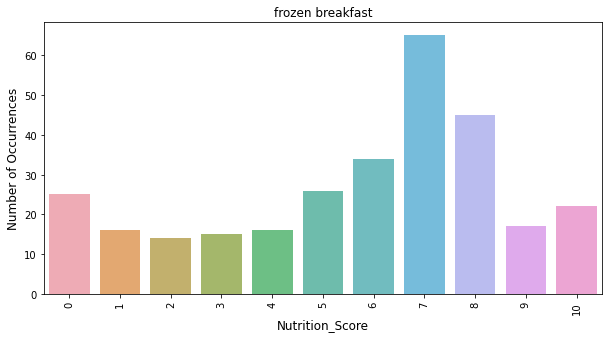

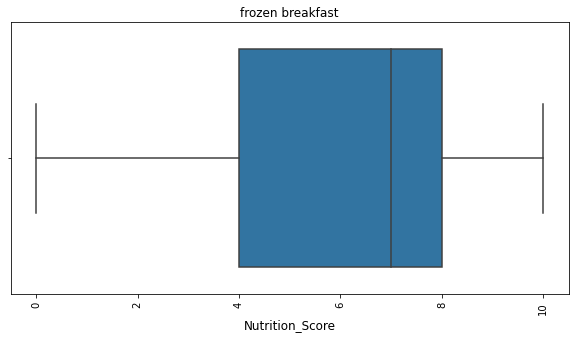

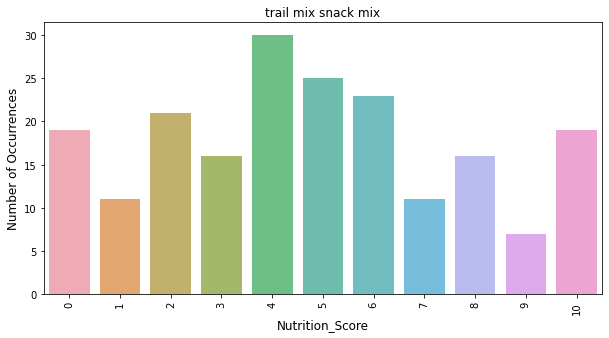

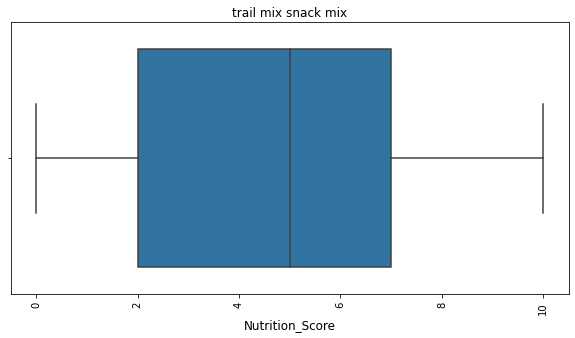

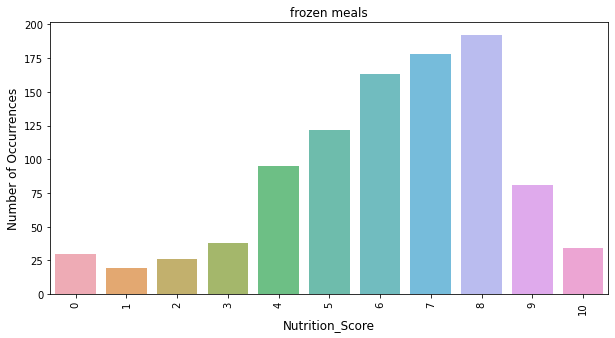

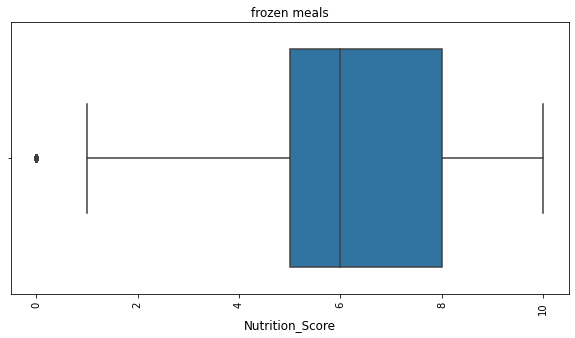

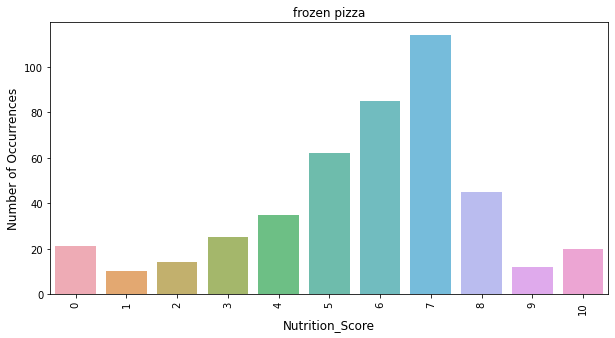

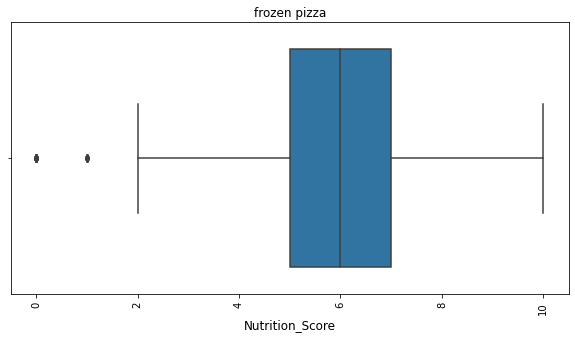

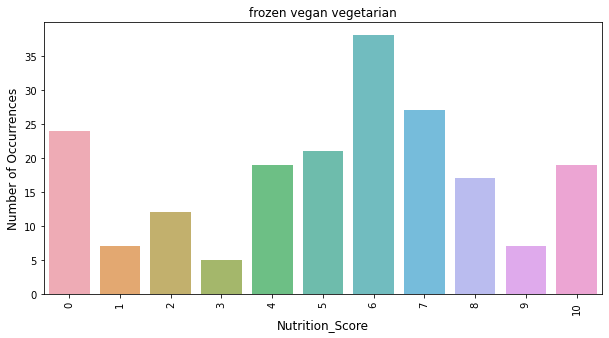

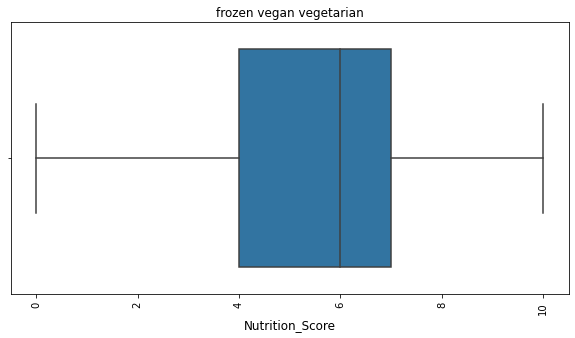

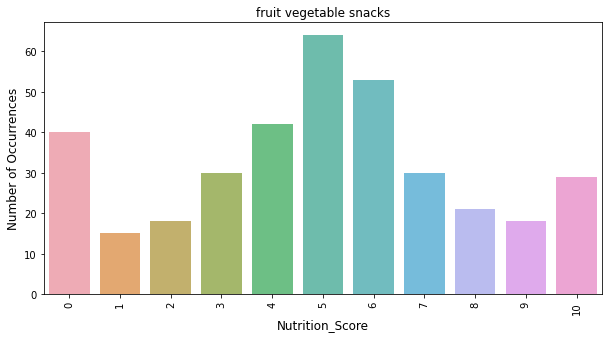

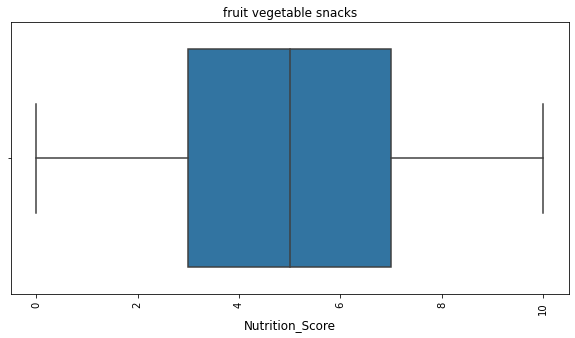

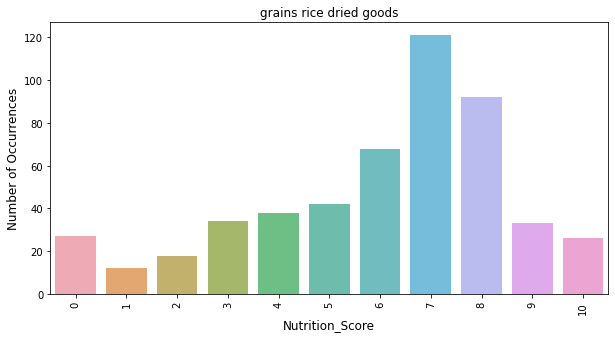

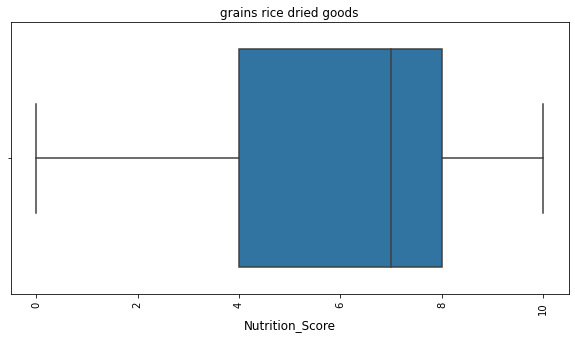

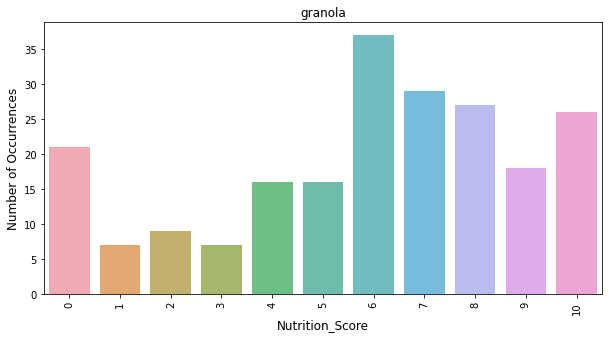

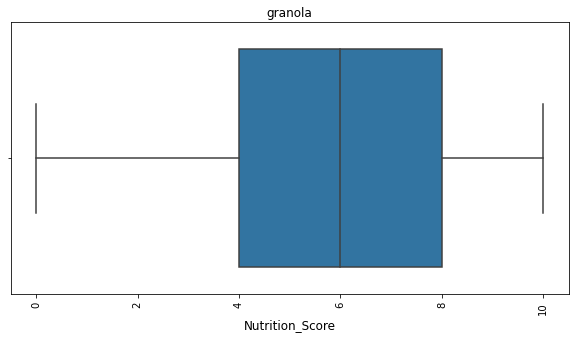

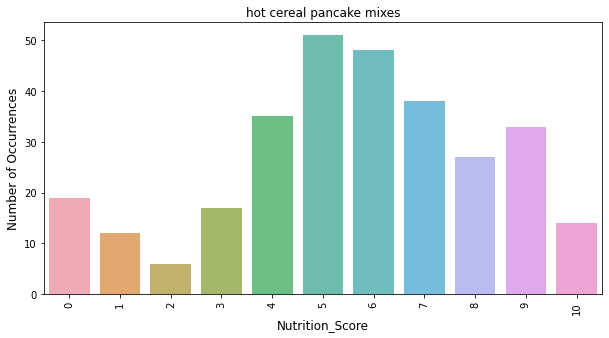

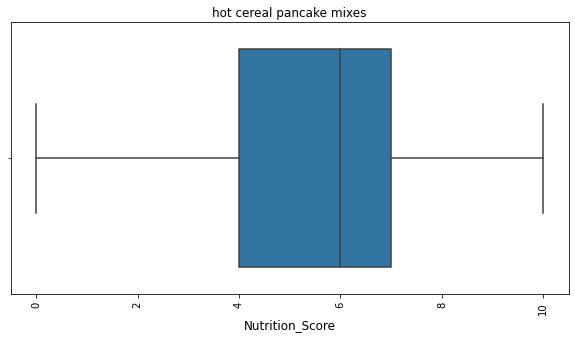

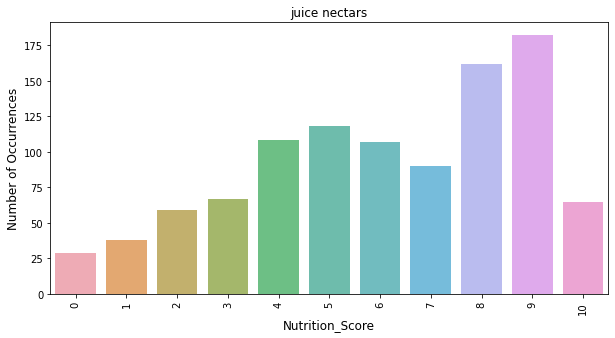

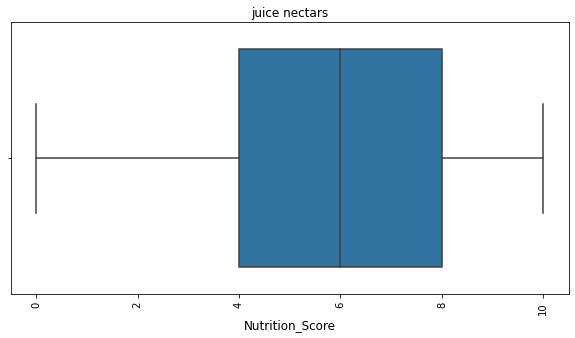

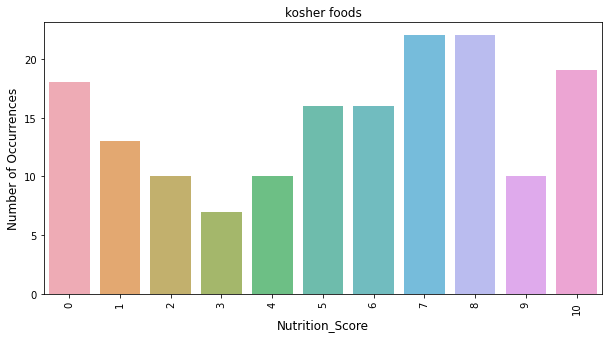

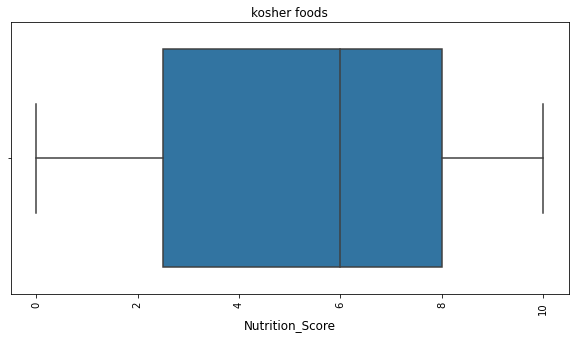

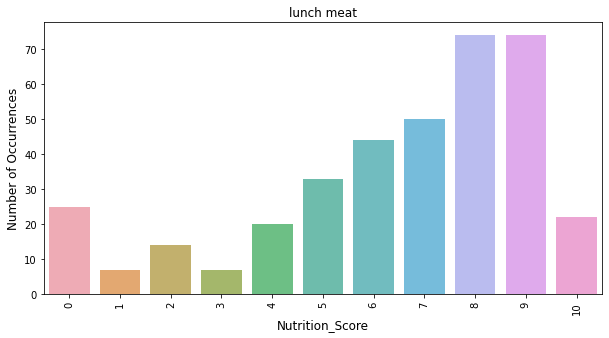

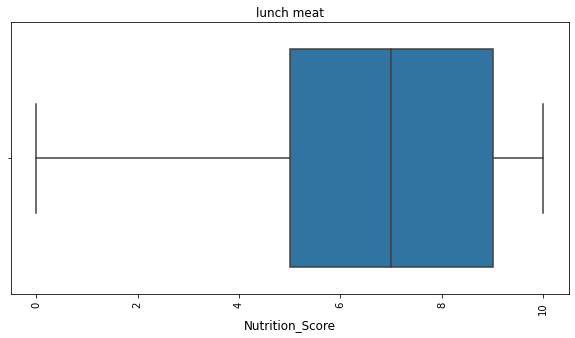

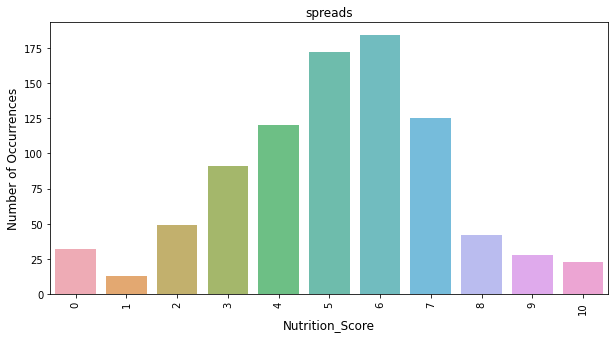

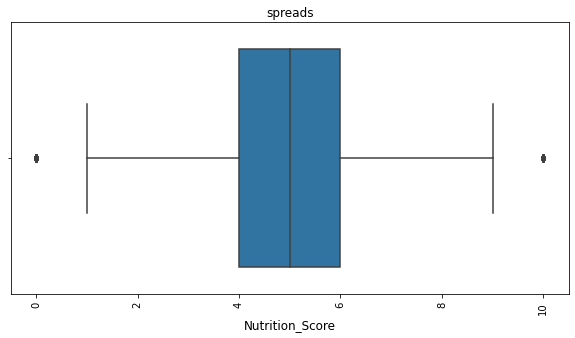

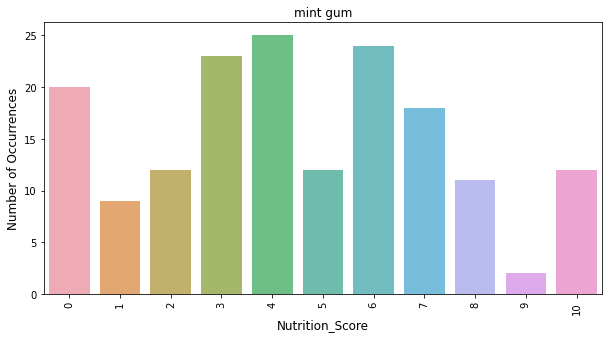

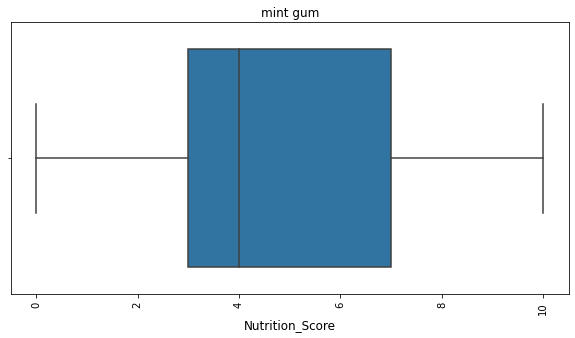

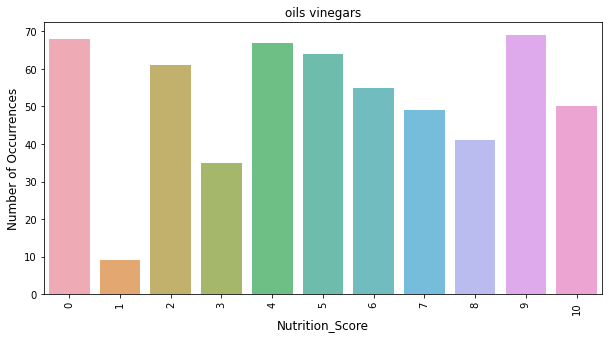

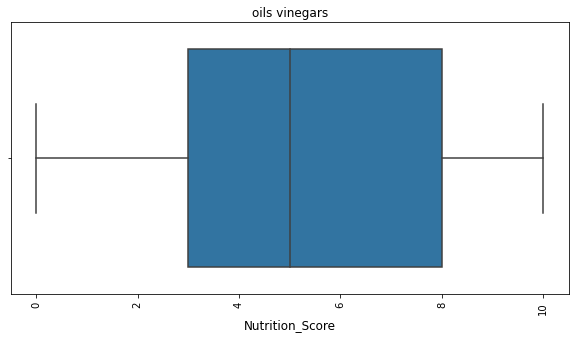

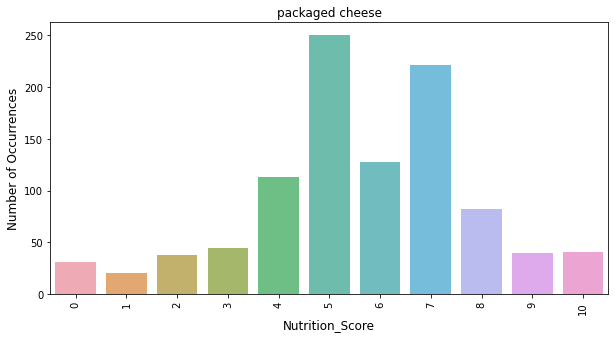

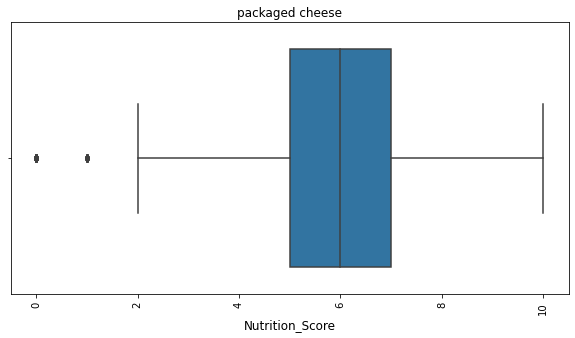

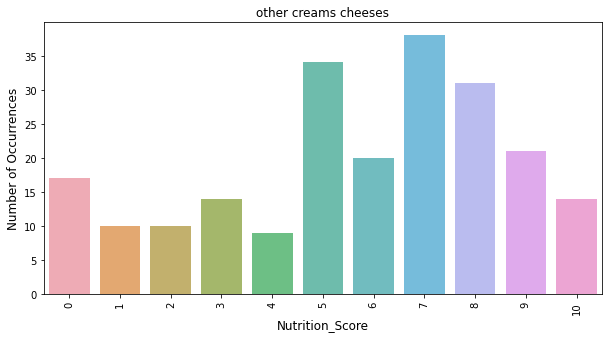

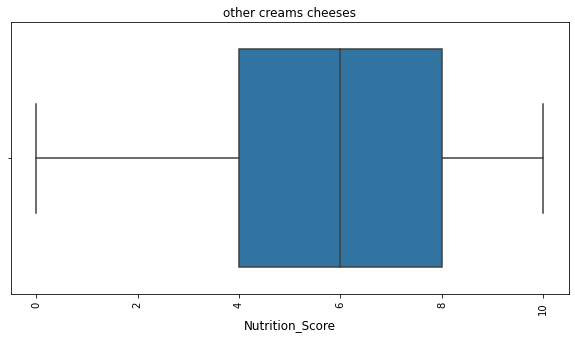

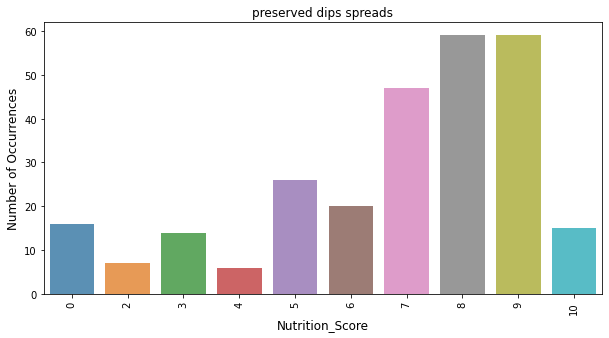

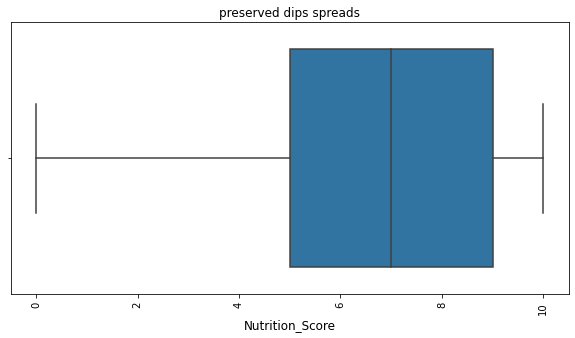

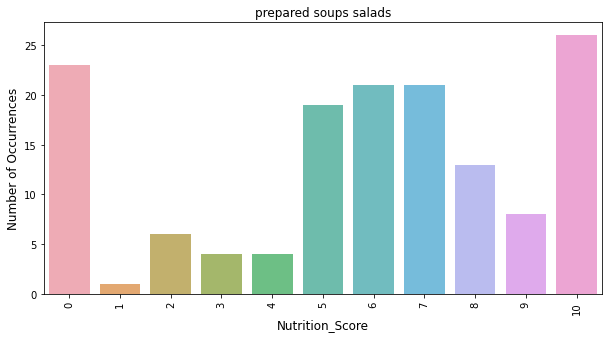

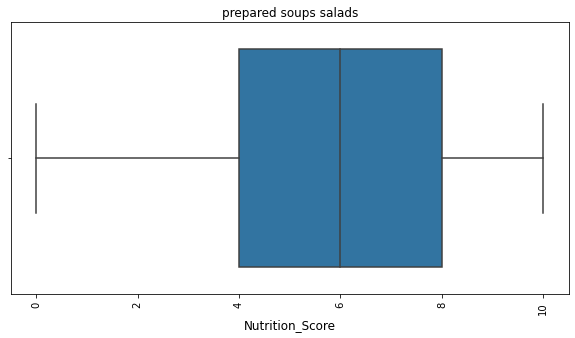

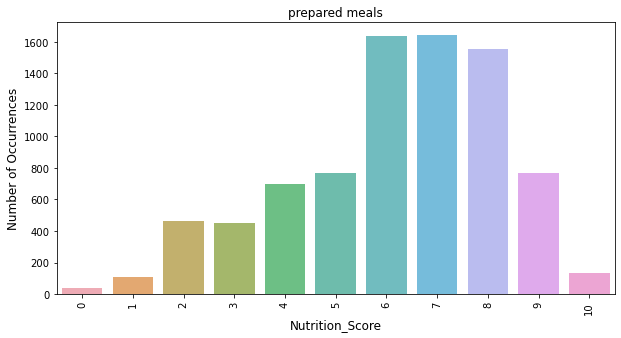

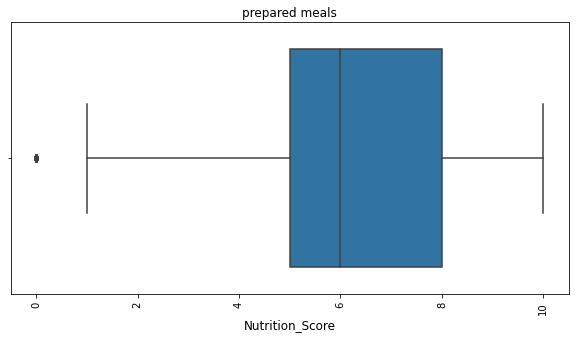

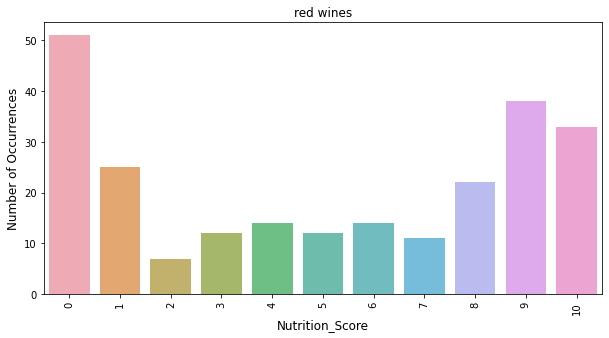

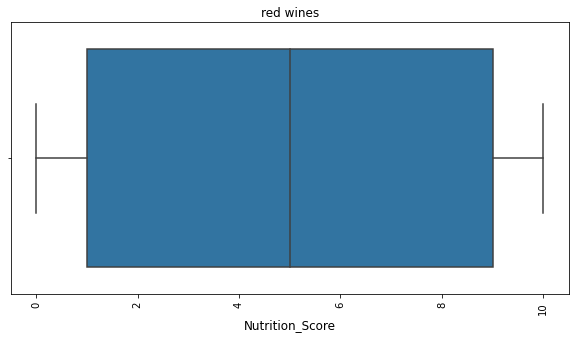

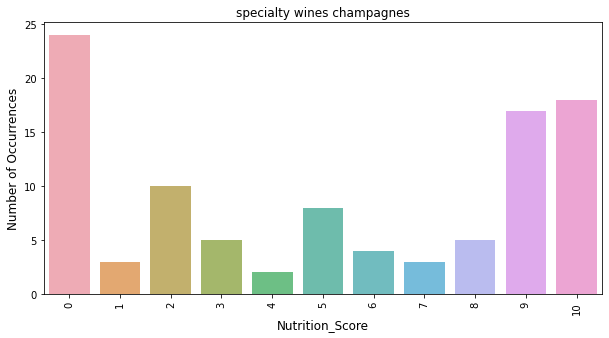

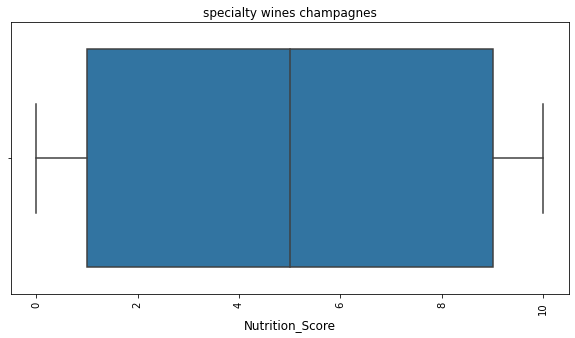

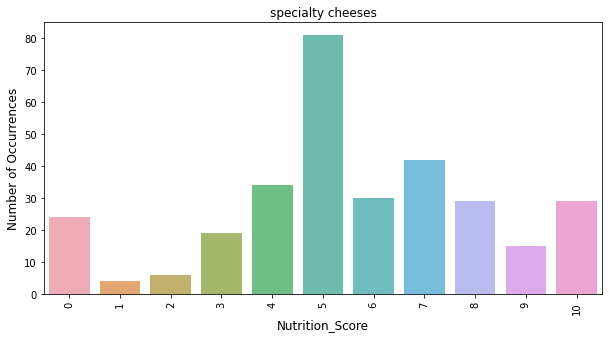

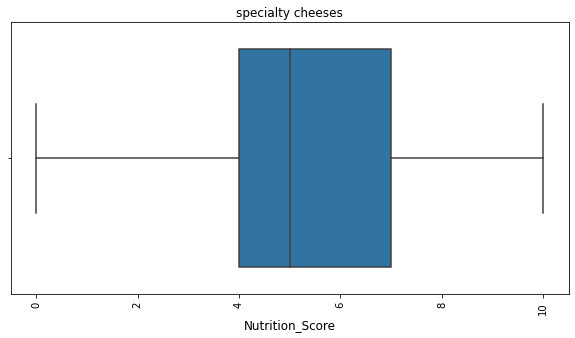

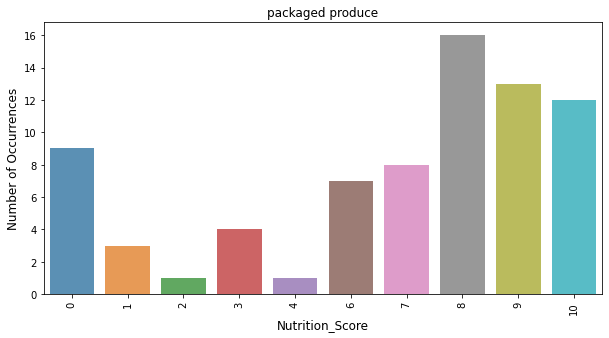

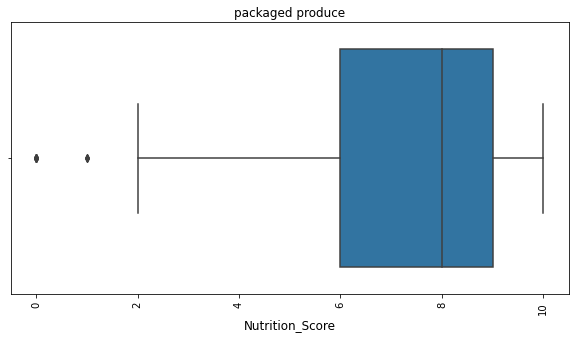

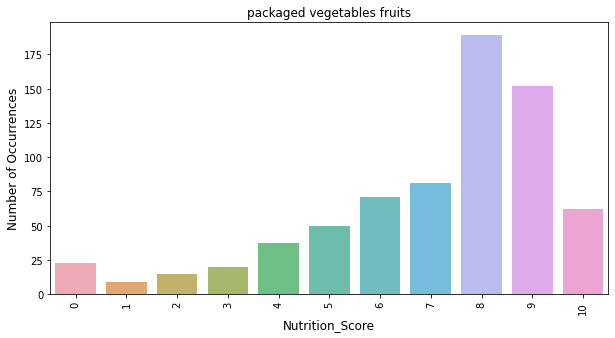

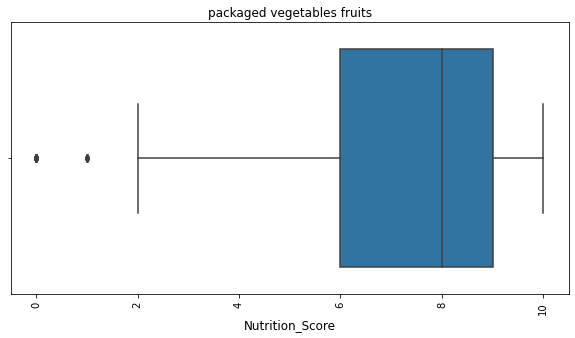

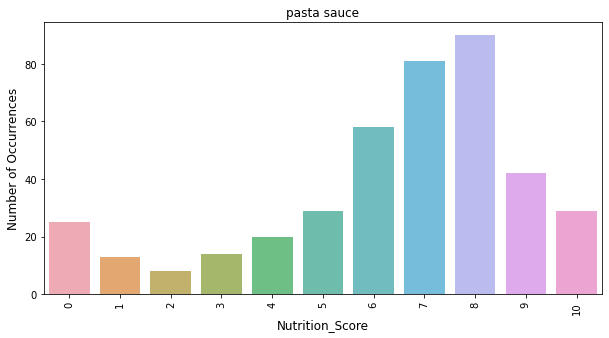

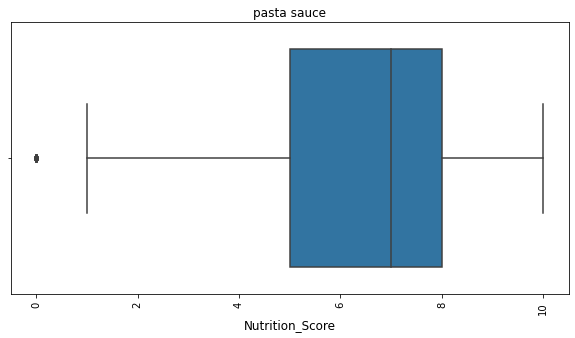

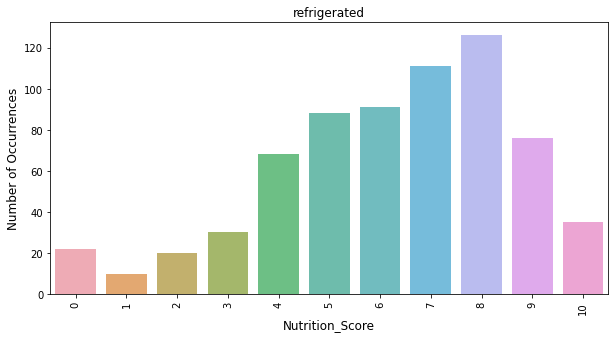

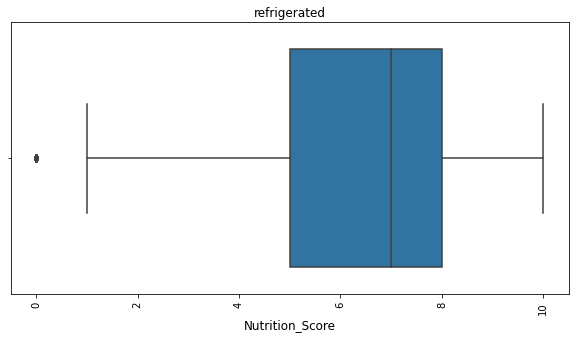

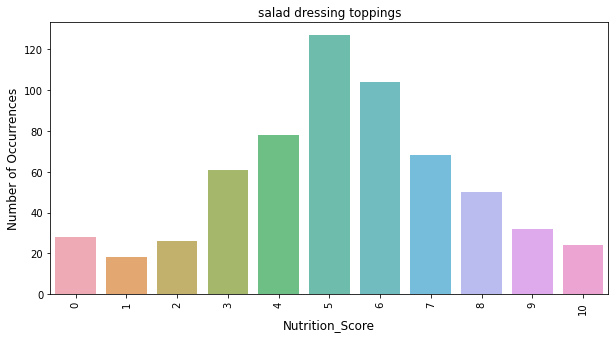

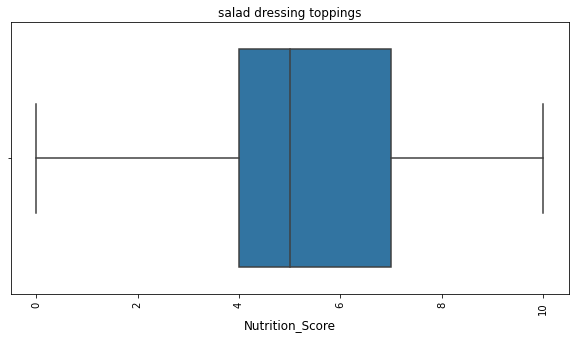

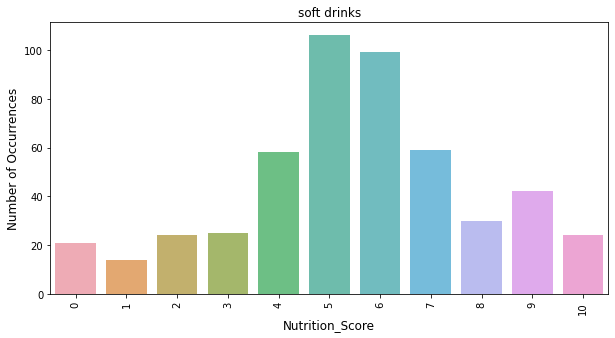

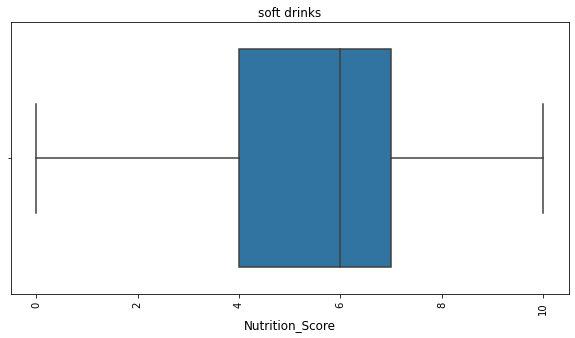

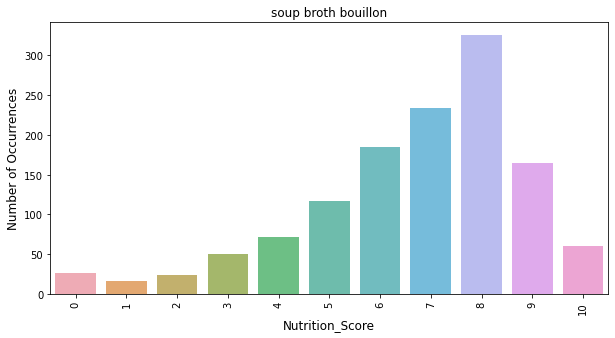

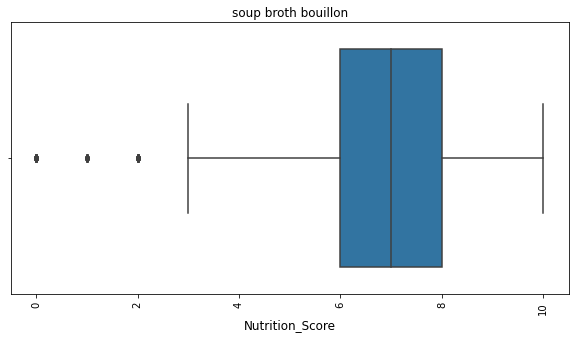

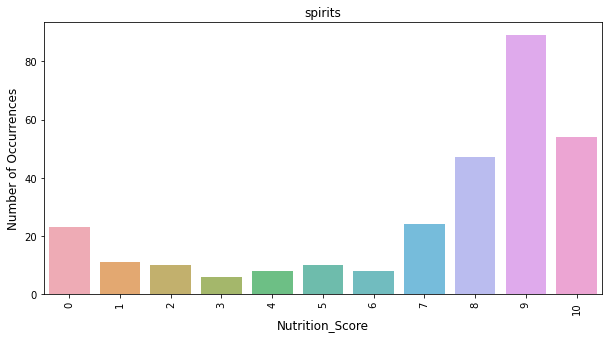

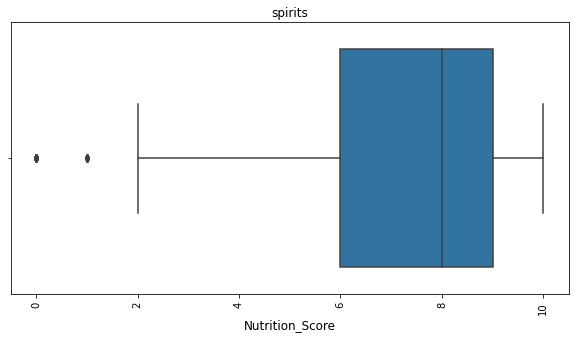

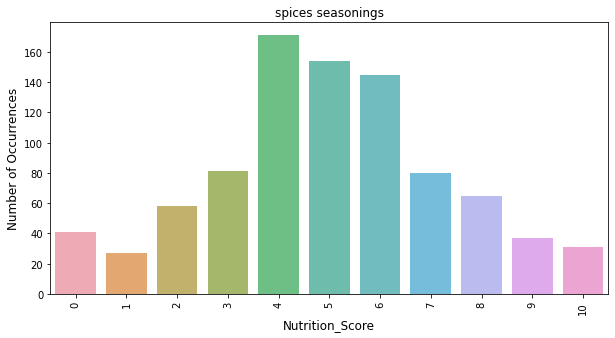

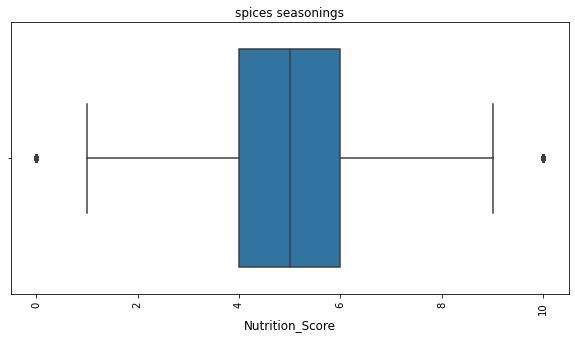

In [78]:
for aisle_name in aisle_list:
    plot_barplot_aisle(food_score, aisle_name)
    plot_boxplot_aisle(food_score, aisle_name)
    

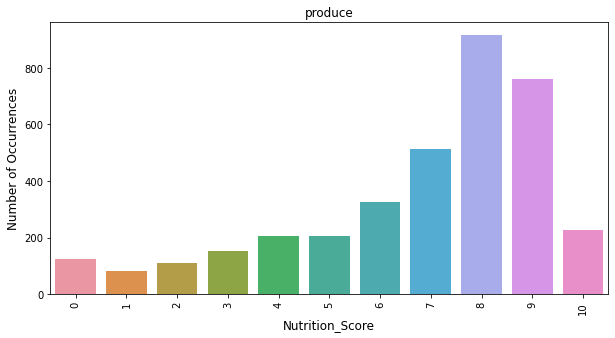

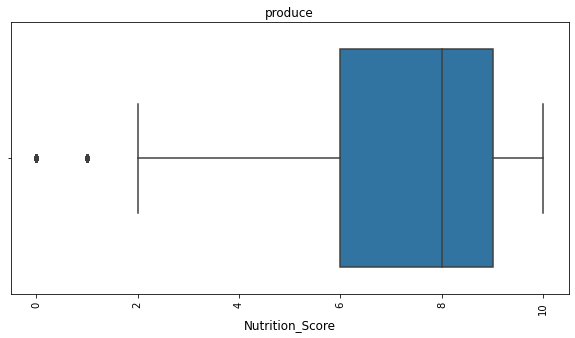

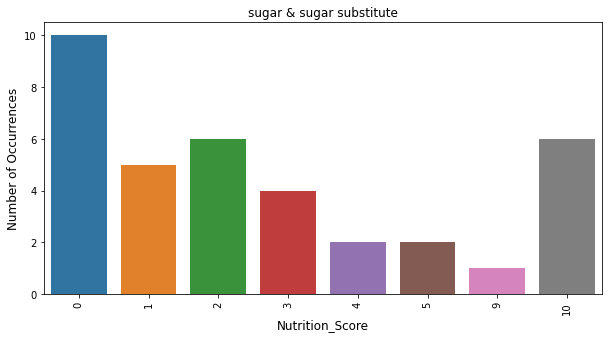

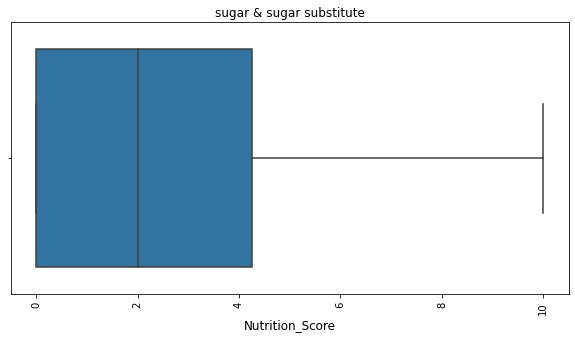

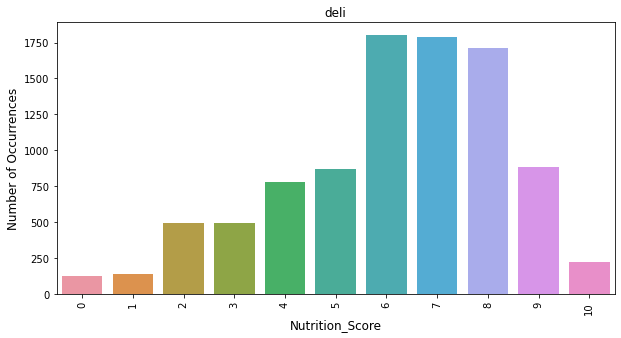

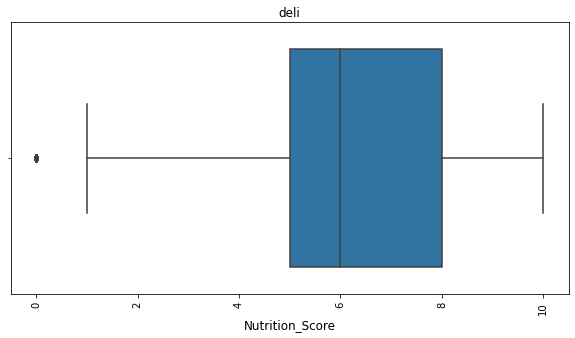

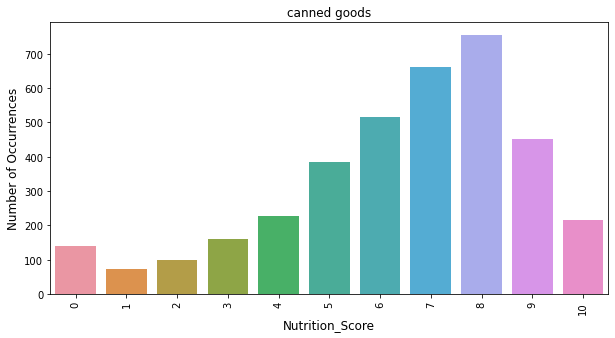

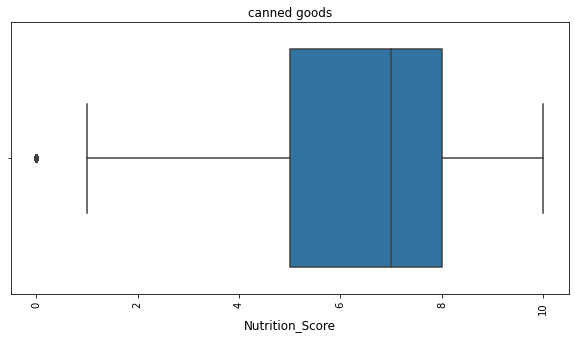

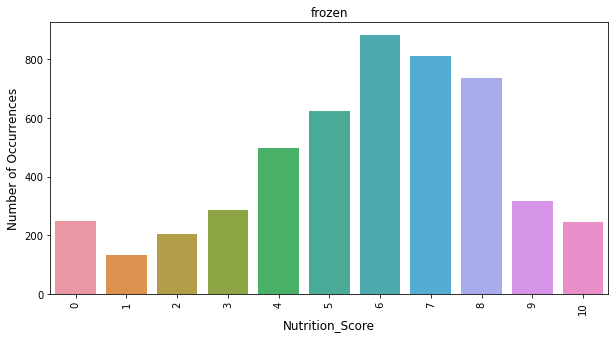

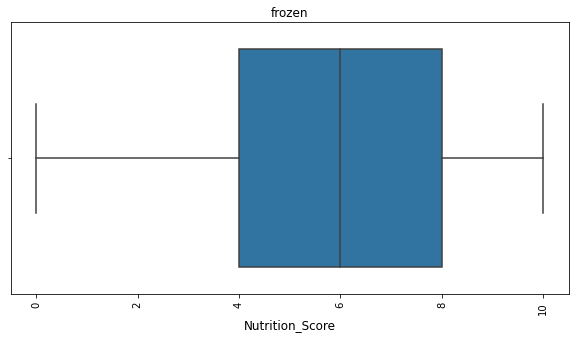

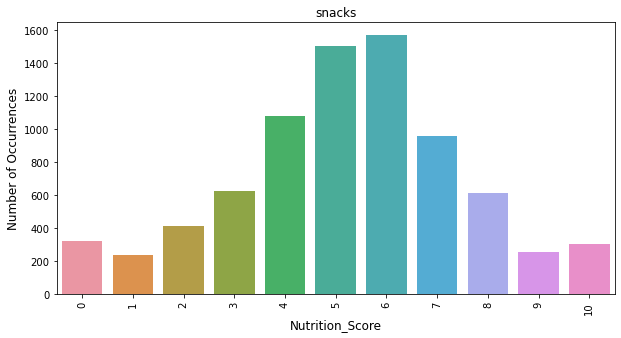

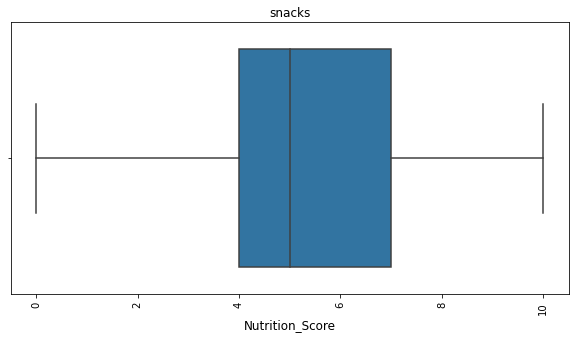

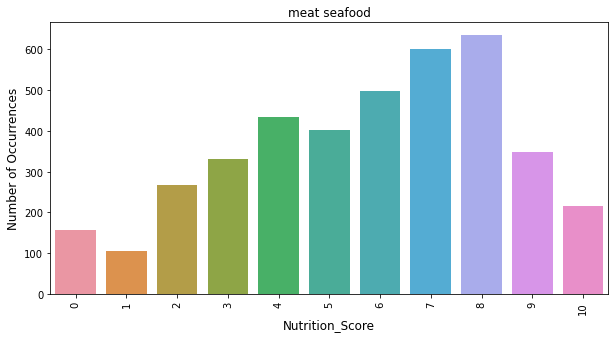

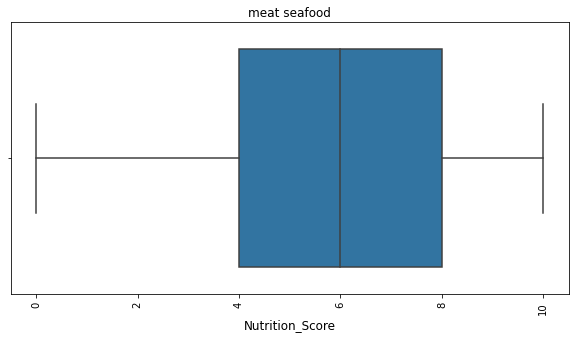

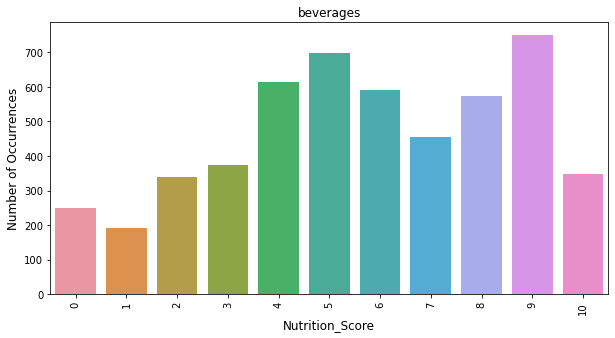

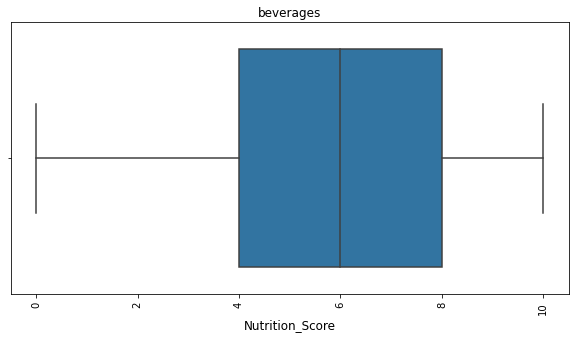

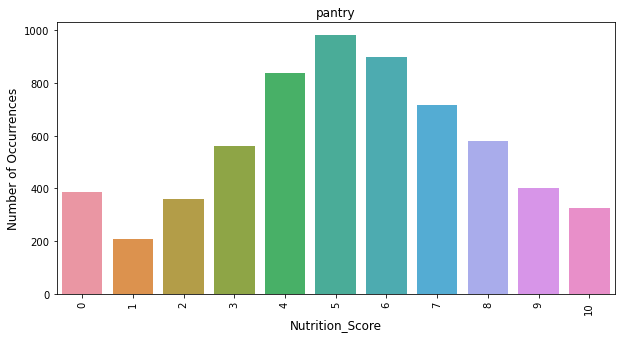

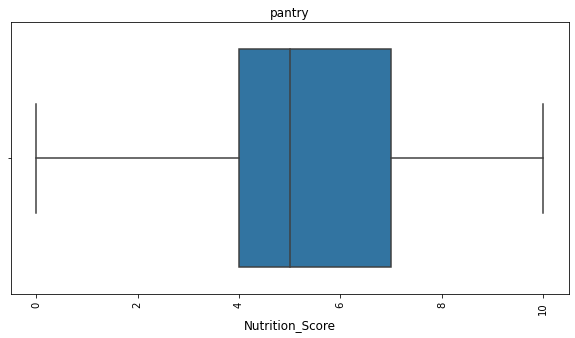

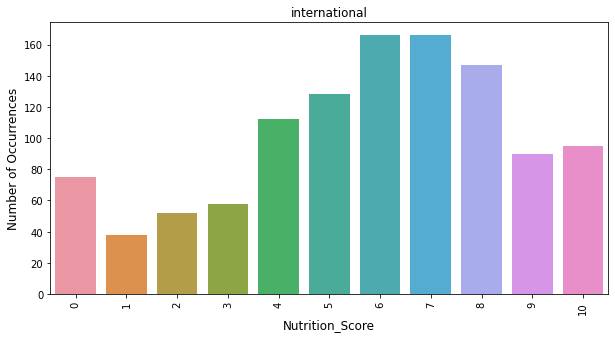

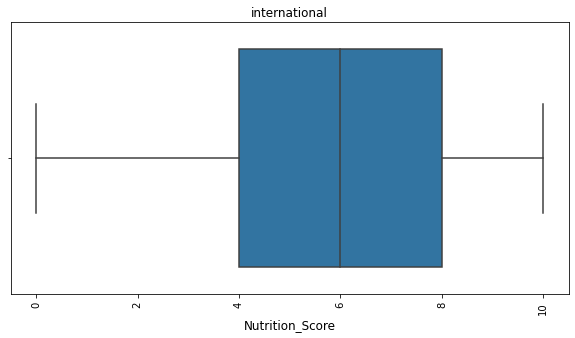

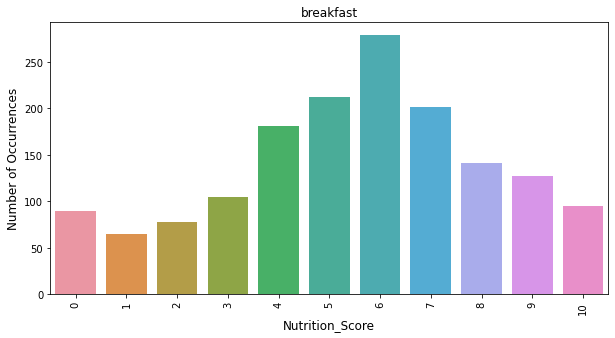

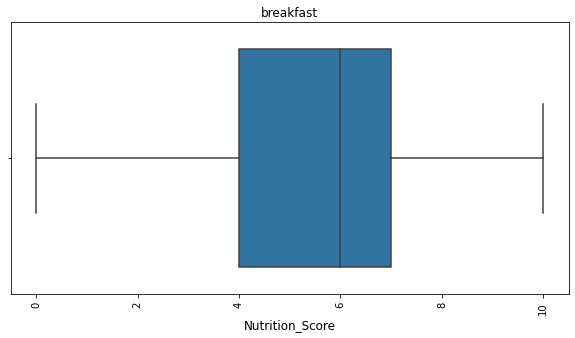

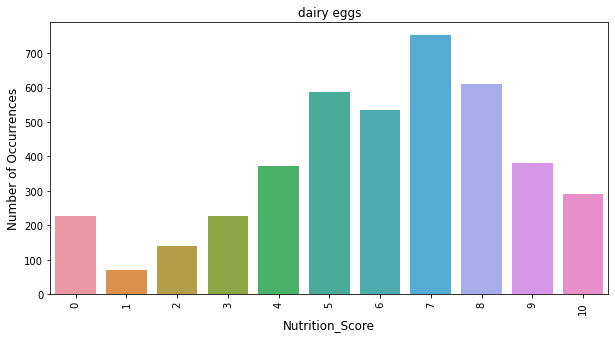

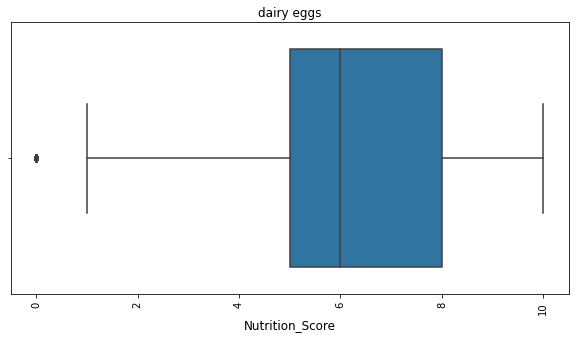

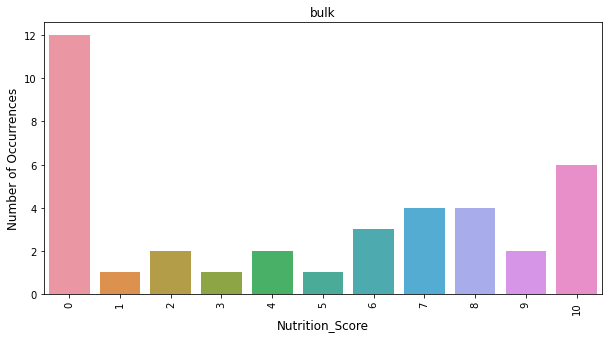

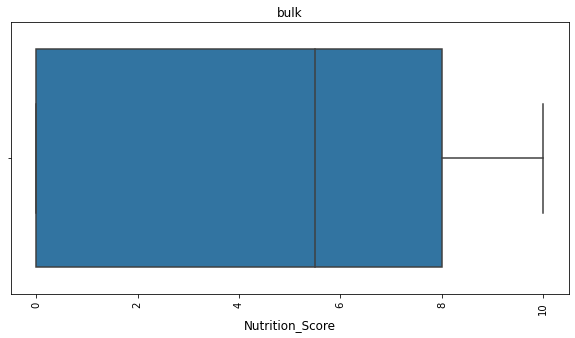

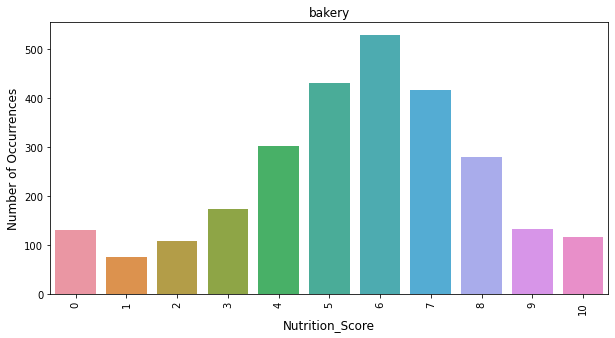

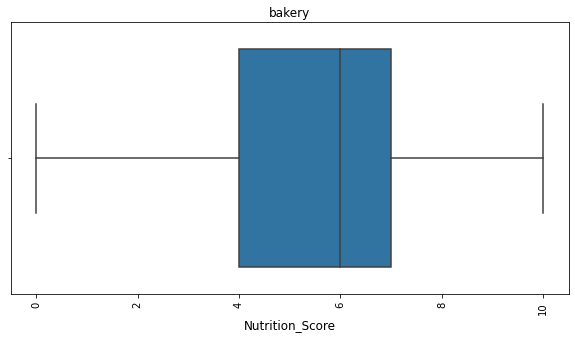

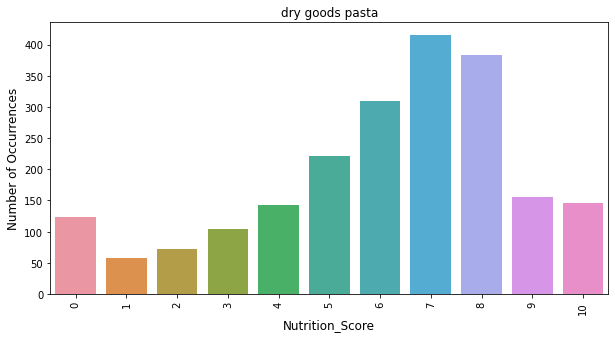

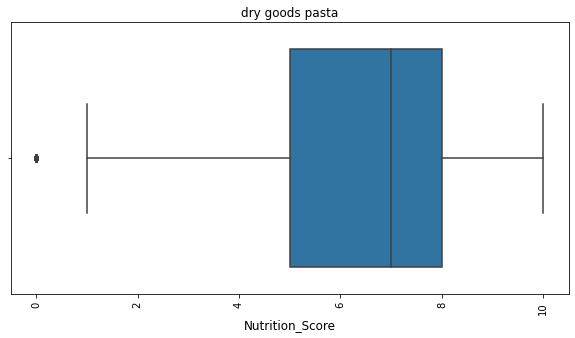

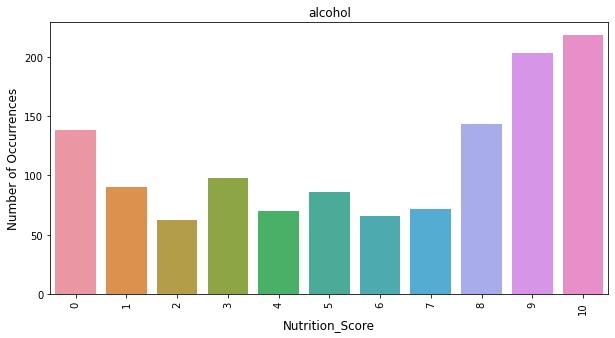

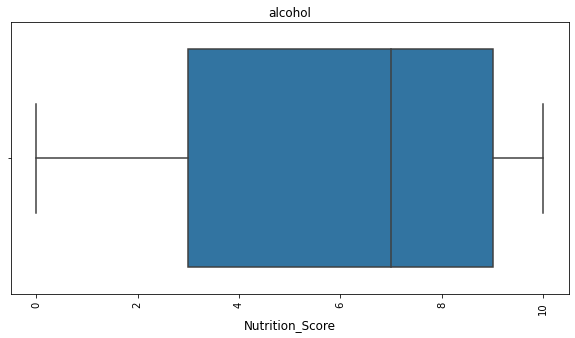

In [94]:
# score distribution of each department
for dep_name in dep_list:
    plot_barplot_dep(food_score, dep_name)
    plot_boxplot_dep(food_score, dep_name)